<h1><center>Concrete Strength Prediction</center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset - Concrete Data

##### Description of the dataset
The dataset describes the strength of the concrete for different proportions of its ingredients. The various ingredients that helps to determine the strength of the concrete includes:
<ul>
    <li>Cement</li>
    <li>Blast Furnace Slag</li>
    <li>Fly Ash</li>
    <li>Water</li>
    <li>Superplasticizer</li>
    <li>Coarse Aggregate</li>
    <li>Fine Aggregate</li>
    </ul>

In [2]:
# Loading the data
concrete_df = pd.read_csv('concrete_data.csv')
concrete_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# Shape of the data
concrete_df.shape

(1030, 9)

In [4]:
# Checking the dataset for missing values
concrete_df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
# Counting the null values in each feature of the dataset
concrete_df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data is very clean. Thus it is ready to build a model. Before building a model, let us visualize it.

### Dataset Visualization

In [6]:
# Visualizing the dataset
features = concrete_df.columns
features

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

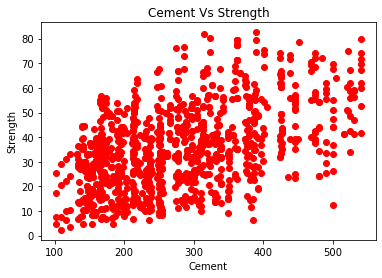

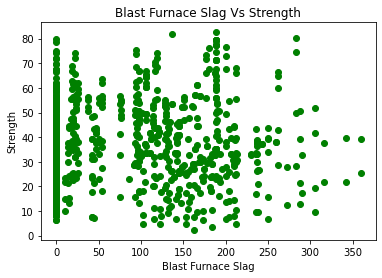

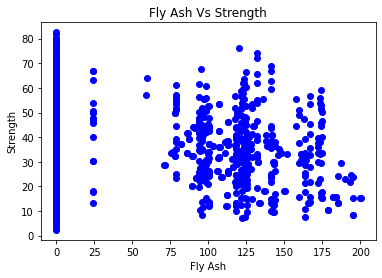

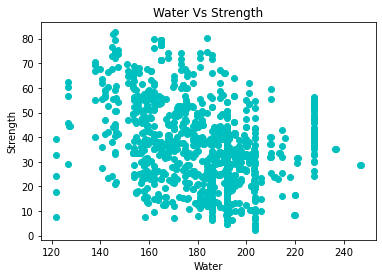

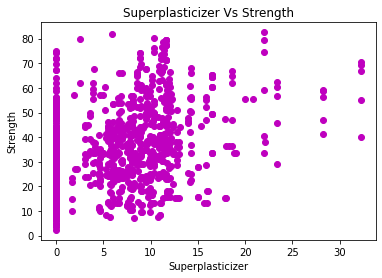

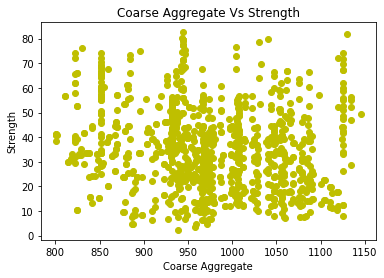

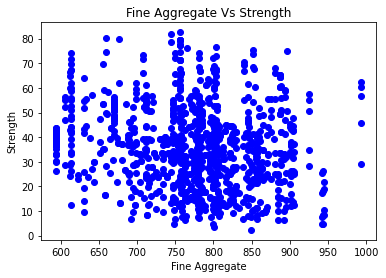

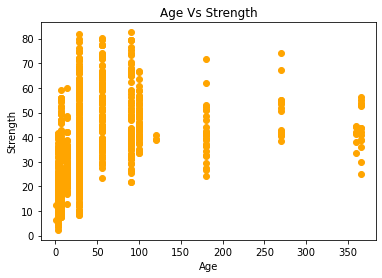

In [7]:
color = ['r','g','b','c','m','y','blue','orange']
for i in range(len(features)-1):
    x_cor = concrete_df[features[i]].values
    y_cor = concrete_df[features[-1]].values
    plt.scatter(x_cor,y_cor,color=color[i])
    plt.xlabel(features[i])
    plt.ylabel('Strength')
    plt.title('{0} Vs Strength'.format(features[i]))
    plt.show()

### Seperating Predictor Variables and Response Variables

In [8]:
 # Getting all the columns except the 'Strength' column
X = concrete_df[features[features != features[-1]]]
# Getting the 'Response variable', that is the 'Strength' column
Y = concrete_df[[features[-1]]]

In [9]:
# Getting the shape of the predictor and response variable
print('Size of preditor variable:',X.shape)
print('Size of response variable:',Y.shape)

Size of preditor variable: (1030, 8)
Size of response variable: (1030, 1)


In [10]:
# Number of columns in predictor data
n_cols = X.shape[1]
n_cols

8

## A. BASE LINE MODEL

**Charecteristics of the neural network:**
<ul>
    <li><b>1</b> hidden layer - with <b>10</b> nodes</li>
    <li><b>Activation Function</b>: ReLU </li>
    <li><b>Optimizer used</b>: Adam</li>
    <li><b>Loss Function</b>: Mean Squared Error (MSE)</li>
</ul>

The data is randomly split into test sets (**30%**) and train sets (**70%**) and fed into the **Base Line Model**. The model is trained using **50** epochs. Using the test data the model is evaluated and Mean Sqaured Error (**MSE**) is computed.
<BR>
The baseline model is trained and tested **50 times** each time a different train and test data randomly fed from the dataset, thus computing a set of 50 mean squared errors. Hence the best value of mean squared error is computed and standard deviation is also computed from it.

In [11]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [12]:
# Building the neural network
def base_line_model():
    # Model Creation
    reg_mod = Sequential()
    reg_mod.add(Dense(10, activation='relu',input_shape=(n_cols,)))
    reg_mod.add(Dense(1))
    # Model compilation
    reg_mod.compile(optimizer='adam', loss='mean_squared_error')
    return reg_mod

#### Dataset split
<ol>
    <li>Training set: <b>70%</b></li>
    <li>Testing set: <b>30%</b></li>
    </ol>

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [14]:
def MSE(model, predictor_set, response_set, epochs):
    
    # Dataset split randomly 
    # Training set - 70 %
    # Testing set - 30 %
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=5)
    print('-----DESCRIPTION----'+' Predictors '+'Labels')
    print('Size of training set:',x_train.shape,y_train.shape)
    print('Size of testing set: ',x_test.shape,y_test.shape)
    
    # Training the model with training set using a nuumber epochs
    # Fitting the built model with the training set
    model.fit(x_train, y_train, validation_split = 0.3, epochs=epochs,verbose=1)
    
    # Evaluating the model using the test data and predicted value, thus computing mean squared error

    # Predicting the values
    y_pred = model.predict(x_test)
    
    # Computing mean squared error
    MSE = mean_squared_error(y_test,y_pred)
    return MSE

In [15]:
model = base_line_model()

In [16]:
mse = [] # Initializing the list for appending the MSE upon each iteration
for i in range(50):
    mse.append(MSE(model, X, Y, 50))

-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 12ms/step - loss: 38985.9961 - val_loss: 25293.2148
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 17399.9570 - val_loss: 10466.1982
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 6762.6709 - val_loss: 3965.6138
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 2487.9043 - val_loss: 1727.2634
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 1210.9597 - val_loss: 1106.7258
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 917.6122 - val_loss: 971.9320
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 858.9481 - val_loss: 934.8622
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 829.3625 - val_loss: 910.0807
Epoch 9/50
16/16 [==============================] 

16/16 [==============================] - 0s 5ms/step - loss: 123.1381 - val_loss: 140.5377
Epoch 28/50
16/16 [==============================] - 0s 6ms/step - loss: 121.7219 - val_loss: 135.4908
Epoch 29/50
16/16 [==============================] - 0s 5ms/step - loss: 122.0263 - val_loss: 138.6631
Epoch 30/50
16/16 [==============================] - 0s 5ms/step - loss: 120.7167 - val_loss: 134.6523
Epoch 31/50
16/16 [==============================] - 0s 5ms/step - loss: 120.3734 - val_loss: 133.1747
Epoch 32/50
16/16 [==============================] - 0s 4ms/step - loss: 120.2177 - val_loss: 133.2183
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 120.1223 - val_loss: 134.9470
Epoch 34/50
16/16 [==============================] - 0s 5ms/step - loss: 119.6686 - val_loss: 134.9159
Epoch 35/50
16/16 [==============================] - 0s 5ms/step - loss: 120.0277 - val_loss: 131.0689
Epoch 36/50
16/16 [==============================] - 0s 6ms/step - loss: 118.8387 - v

16/16 [==============================] - 0s 4ms/step - loss: 111.0666 - val_loss: 115.1545
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 111.7728 - val_loss: 114.8991
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 110.5236 - val_loss: 116.9832
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 111.2006 - val_loss: 132.6696
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 115.5598 - val_loss: 115.6990
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 111.5487 - val_loss: 114.1645
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 109.7093 - val_loss: 116.2180
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 109.3637 - val_loss: 113.9124
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 109.8813 - val_loss: 119.3062
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 109.7938 - val_los

16/16 [==============================] - 0s 4ms/step - loss: 108.0385 - val_loss: 116.0025
Epoch 32/50
16/16 [==============================] - 0s 4ms/step - loss: 109.6239 - val_loss: 113.4839
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 109.1445 - val_loss: 118.8506
Epoch 34/50
16/16 [==============================] - 0s 5ms/step - loss: 109.2747 - val_loss: 112.6886
Epoch 35/50
16/16 [==============================] - 0s 6ms/step - loss: 109.5504 - val_loss: 111.6447
Epoch 36/50
16/16 [==============================] - 0s 4ms/step - loss: 112.6744 - val_loss: 112.0685
Epoch 37/50
16/16 [==============================] - 0s 5ms/step - loss: 110.7500 - val_loss: 112.3427
Epoch 38/50
16/16 [==============================] - 0s 5ms/step - loss: 111.7241 - val_loss: 111.5289
Epoch 39/50
16/16 [==============================] - 0s 4ms/step - loss: 109.1591 - val_loss: 112.1325
Epoch 40/50
16/16 [==============================] - 0s 5ms/step - loss: 111.1900 - v

16/16 [==============================] - 0s 5ms/step - loss: 109.6040 - val_loss: 111.5382
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 108.6029 - val_loss: 111.0083
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 108.3673 - val_loss: 111.3374
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 108.5876 - val_loss: 114.2313
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 109.0944 - val_loss: 111.1147
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 109.4974 - val_loss: 111.1102
Epoch 13/50
16/16 [==============================] - 0s 5ms/step - loss: 109.4313 - val_loss: 113.4748
Epoch 14/50
16/16 [==============================] - 0s 5ms/step - loss: 108.4579 - val_loss: 117.1860
Epoch 15/50
16/16 [==============================] - 0s 5ms/step - loss: 108.5135 - val_loss: 112.7972
Epoch 16/50
16/16 [==============================] - 0s 4ms/step - loss: 108.8942 - val

16/16 [==============================] - 0s 5ms/step - loss: 110.2999 - val_loss: 110.6153
Epoch 36/50
16/16 [==============================] - 0s 5ms/step - loss: 111.6487 - val_loss: 110.9687
Epoch 37/50
16/16 [==============================] - 0s 4ms/step - loss: 111.3765 - val_loss: 111.3025
Epoch 38/50
16/16 [==============================] - 0s 4ms/step - loss: 118.3637 - val_loss: 111.5407
Epoch 39/50
16/16 [==============================] - 0s 4ms/step - loss: 108.7447 - val_loss: 111.9286
Epoch 40/50
16/16 [==============================] - 0s 4ms/step - loss: 109.2288 - val_loss: 112.6910
Epoch 41/50
16/16 [==============================] - 0s 4ms/step - loss: 115.9596 - val_loss: 111.7645
Epoch 42/50
16/16 [==============================] - 0s 4ms/step - loss: 110.5977 - val_loss: 123.9956
Epoch 43/50
16/16 [==============================] - 0s 4ms/step - loss: 108.7094 - val_loss: 110.5122
Epoch 44/50
16/16 [==============================] - 0s 5ms/step - loss: 108.5950 - v

16/16 [==============================] - 0s 5ms/step - loss: 109.9772 - val_loss: 118.6494
Epoch 12/50
16/16 [==============================] - 0s 4ms/step - loss: 108.1836 - val_loss: 110.7032
Epoch 13/50
16/16 [==============================] - 0s 4ms/step - loss: 107.5929 - val_loss: 115.9271
Epoch 14/50
16/16 [==============================] - 0s 4ms/step - loss: 111.1174 - val_loss: 113.0082
Epoch 15/50
16/16 [==============================] - 0s 4ms/step - loss: 108.6399 - val_loss: 113.2527
Epoch 16/50
16/16 [==============================] - 0s 4ms/step - loss: 107.8436 - val_loss: 111.6350
Epoch 17/50
16/16 [==============================] - 0s 4ms/step - loss: 109.7710 - val_loss: 111.8590
Epoch 18/50
16/16 [==============================] - 0s 5ms/step - loss: 110.3198 - val_loss: 114.0211
Epoch 19/50
16/16 [==============================] - 0s 4ms/step - loss: 110.2411 - val_loss: 111.1758
Epoch 20/50
16/16 [==============================] - 0s 5ms/step - loss: 110.9499 - v

16/16 [==============================] - 0s 5ms/step - loss: 115.2757 - val_loss: 125.7137
Epoch 40/50
16/16 [==============================] - 0s 5ms/step - loss: 109.2469 - val_loss: 121.3798
Epoch 41/50
16/16 [==============================] - 0s 5ms/step - loss: 109.5285 - val_loss: 113.9334
Epoch 42/50
16/16 [==============================] - 0s 5ms/step - loss: 107.7718 - val_loss: 111.6397
Epoch 43/50
16/16 [==============================] - 0s 5ms/step - loss: 107.9940 - val_loss: 111.4717
Epoch 44/50
16/16 [==============================] - 0s 4ms/step - loss: 113.5316 - val_loss: 114.4653
Epoch 45/50
16/16 [==============================] - 0s 4ms/step - loss: 118.8100 - val_loss: 111.0736
Epoch 46/50
16/16 [==============================] - 0s 5ms/step - loss: 111.4448 - val_loss: 120.0925
Epoch 47/50
16/16 [==============================] - 0s 5ms/step - loss: 112.5038 - val_loss: 122.0594
Epoch 48/50
16/16 [==============================] - 0s 5ms/step - loss: 111.6219 - v

16/16 [==============================] - 0s 5ms/step - loss: 107.8749 - val_loss: 110.6698
Epoch 16/50
16/16 [==============================] - 0s 5ms/step - loss: 109.6022 - val_loss: 110.4796
Epoch 17/50
16/16 [==============================] - 0s 4ms/step - loss: 109.4597 - val_loss: 110.0671
Epoch 18/50
16/16 [==============================] - 0s 4ms/step - loss: 108.5992 - val_loss: 114.5110
Epoch 19/50
16/16 [==============================] - 0s 5ms/step - loss: 114.5901 - val_loss: 114.1315
Epoch 20/50
16/16 [==============================] - 0s 5ms/step - loss: 109.1544 - val_loss: 114.3767
Epoch 21/50
16/16 [==============================] - 0s 5ms/step - loss: 108.8820 - val_loss: 111.8870
Epoch 22/50
16/16 [==============================] - 0s 5ms/step - loss: 110.3624 - val_loss: 110.5956
Epoch 23/50
16/16 [==============================] - 0s 5ms/step - loss: 108.9265 - val_loss: 112.3364
Epoch 24/50
16/16 [==============================] - 0s 4ms/step - loss: 109.6797 - v

16/16 [==============================] - 0s 5ms/step - loss: 109.1095 - val_loss: 110.8350
Epoch 44/50
16/16 [==============================] - 0s 5ms/step - loss: 108.3722 - val_loss: 110.8260
Epoch 45/50
16/16 [==============================] - 0s 5ms/step - loss: 108.2048 - val_loss: 113.9144
Epoch 46/50
16/16 [==============================] - 0s 5ms/step - loss: 110.7348 - val_loss: 113.8661
Epoch 47/50
16/16 [==============================] - 0s 5ms/step - loss: 109.6704 - val_loss: 117.8861
Epoch 48/50
16/16 [==============================] - 0s 5ms/step - loss: 111.1435 - val_loss: 118.7317
Epoch 49/50
16/16 [==============================] - 0s 5ms/step - loss: 107.5242 - val_loss: 111.6173
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 107.7470 - val_loss: 118.9515
Epoch

16/16 [==============================] - 0s 4ms/step - loss: 108.5351 - val_loss: 111.3625
Epoch 20/50
16/16 [==============================] - 0s 5ms/step - loss: 108.7522 - val_loss: 115.4000
Epoch 21/50
16/16 [==============================] - 0s 6ms/step - loss: 108.4384 - val_loss: 119.3738
Epoch 22/50
16/16 [==============================] - 0s 5ms/step - loss: 110.2188 - val_loss: 115.3031
Epoch 23/50
16/16 [==============================] - 0s 4ms/step - loss: 108.7774 - val_loss: 111.2131
Epoch 24/50
16/16 [==============================] - 0s 5ms/step - loss: 107.6940 - val_loss: 114.4279
Epoch 25/50
16/16 [==============================] - 0s 5ms/step - loss: 109.4041 - val_loss: 112.6666
Epoch 26/50
16/16 [==============================] - 0s 5ms/step - loss: 107.9302 - val_loss: 111.6941
Epoch 27/50
16/16 [==============================] - 0s 5ms/step - loss: 112.7327 - val_loss: 114.1403
Epoch 28/50
16/16 [==============================] - 0s 5ms/step - loss: 112.7756 - v

16/16 [==============================] - 0s 5ms/step - loss: 110.0181 - val_loss: 110.8806
Epoch 48/50
16/16 [==============================] - 0s 5ms/step - loss: 111.3833 - val_loss: 116.0017
Epoch 49/50
16/16 [==============================] - 0s 5ms/step - loss: 114.3544 - val_loss: 122.0522
Epoch 50/50
10/10 [==============================] - 0s 1ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 117.0818 - val_loss: 131.1368
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 111.2772 - val_loss: 115.2112
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 108.2571 - val_loss: 111.8834
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 108.8994 - val_loss: 111.2468
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 108.3824 - val_loss: 111.8750
Epoch 6/5

16/16 [==============================] - 0s 4ms/step - loss: 110.0538 - val_loss: 113.5031
Epoch 24/50
16/16 [==============================] - 0s 5ms/step - loss: 110.8604 - val_loss: 111.2937
Epoch 25/50
16/16 [==============================] - 0s 5ms/step - loss: 108.1911 - val_loss: 112.6463
Epoch 26/50
16/16 [==============================] - 0s 5ms/step - loss: 108.0907 - val_loss: 111.6401
Epoch 27/50
16/16 [==============================] - 0s 5ms/step - loss: 109.7691 - val_loss: 123.1305
Epoch 28/50
16/16 [==============================] - 0s 5ms/step - loss: 110.5862 - val_loss: 114.7566
Epoch 29/50
16/16 [==============================] - 0s 5ms/step - loss: 108.0463 - val_loss: 114.2107
Epoch 30/50
16/16 [==============================] - 0s 4ms/step - loss: 109.6524 - val_loss: 112.5154
Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 108.8649 - val_loss: 116.5291
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 109.2317 - v

10/10 [==============================] - 0s 2ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 118.2596 - val_loss: 112.1477
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 107.9231 - val_loss: 112.2602
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 113.4537 - val_loss: 112.9697
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 106.9796 - val_loss: 121.4480
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 108.6611 - val_loss: 112.4777
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 110.4703 - val_loss: 112.4021
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 109.9246 - val_loss: 111.3206
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 118.4038 - val_loss: 112.2199
Epoch 9/50
1

16/16 [==============================] - 0s 5ms/step - loss: 108.0477 - val_loss: 113.0083
Epoch 28/50
16/16 [==============================] - 0s 5ms/step - loss: 112.2013 - val_loss: 112.7292
Epoch 29/50
16/16 [==============================] - 0s 5ms/step - loss: 117.6721 - val_loss: 118.2781
Epoch 30/50
16/16 [==============================] - 0s 4ms/step - loss: 109.5527 - val_loss: 115.6624
Epoch 31/50
16/16 [==============================] - 0s 5ms/step - loss: 112.0027 - val_loss: 140.4240
Epoch 32/50
16/16 [==============================] - 0s 4ms/step - loss: 116.0513 - val_loss: 123.6061
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 110.6060 - val_loss: 113.8153
Epoch 34/50
16/16 [==============================] - 0s 5ms/step - loss: 111.9936 - val_loss: 121.4098
Epoch 35/50
16/16 [==============================] - 0s 6ms/step - loss: 107.4065 - val_loss: 122.8098
Epoch 36/50
16/16 [==============================] - 0s 5ms/step - loss: 110.2807 - v

16/16 [==============================] - 0s 4ms/step - loss: 109.3326 - val_loss: 125.3364
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 109.7771 - val_loss: 113.5288
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 107.9344 - val_loss: 116.0943
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 107.6753 - val_loss: 111.8669
Epoch 7/50
16/16 [==============================] - 0s 8ms/step - loss: 107.6908 - val_loss: 112.7400
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 109.2238 - val_loss: 113.1857
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 111.9064 - val_loss: 111.7455
Epoch 10/50
16/16 [==============================] - 0s 6ms/step - loss: 113.4818 - val_loss: 118.2599
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 109.4295 - val_loss: 118.8781
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 109.5003 - val_los

16/16 [==============================] - 0s 5ms/step - loss: 109.4100 - val_loss: 113.4048
Epoch 32/50
16/16 [==============================] - 0s 5ms/step - loss: 110.1170 - val_loss: 111.3987
Epoch 33/50
16/16 [==============================] - 0s 4ms/step - loss: 107.8750 - val_loss: 111.4037
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 109.6064 - val_loss: 112.9453
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 107.8733 - val_loss: 112.2327
Epoch 36/50
16/16 [==============================] - 0s 3ms/step - loss: 108.9242 - val_loss: 112.2135
Epoch 37/50
16/16 [==============================] - 0s 5ms/step - loss: 108.9719 - val_loss: 111.9646
Epoch 38/50
16/16 [==============================] - 0s 5ms/step - loss: 108.1096 - val_loss: 112.0264
Epoch 39/50
16/16 [==============================] - 0s 5ms/step - loss: 107.1019 - val_loss: 119.7740
Epoch 40/50
16/16 [==============================] - 0s 5ms/step - loss: 107.8853 - v

16/16 [==============================] - 0s 4ms/step - loss: 108.7297 - val_loss: 116.0765
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 109.3985 - val_loss: 116.0883
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 111.0574 - val_loss: 111.8854
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 109.3209 - val_loss: 112.1558
Epoch 11/50
16/16 [==============================] - 0s 6ms/step - loss: 108.1676 - val_loss: 112.8515
Epoch 12/50
16/16 [==============================] - 0s 4ms/step - loss: 110.3936 - val_loss: 111.9447
Epoch 13/50
16/16 [==============================] - 0s 6ms/step - loss: 109.5223 - val_loss: 110.6076
Epoch 14/50
16/16 [==============================] - 0s 5ms/step - loss: 109.9925 - val_loss: 111.2532
Epoch 15/50
16/16 [==============================] - 0s 5ms/step - loss: 108.4969 - val_loss: 113.0830
Epoch 16/50
16/16 [==============================] - 0s 5ms/step - loss: 107.4207 - val

16/16 [==============================] - 0s 5ms/step - loss: 107.8495 - val_loss: 111.8716
Epoch 36/50
16/16 [==============================] - 0s 5ms/step - loss: 109.0539 - val_loss: 112.1478
Epoch 37/50
16/16 [==============================] - 0s 6ms/step - loss: 108.0890 - val_loss: 113.5388
Epoch 38/50
16/16 [==============================] - 0s 4ms/step - loss: 108.3750 - val_loss: 119.7008
Epoch 39/50
16/16 [==============================] - 0s 4ms/step - loss: 111.5135 - val_loss: 121.1635
Epoch 40/50
16/16 [==============================] - 0s 4ms/step - loss: 114.8914 - val_loss: 119.6009
Epoch 41/50
16/16 [==============================] - 0s 4ms/step - loss: 109.1544 - val_loss: 113.2302
Epoch 42/50
16/16 [==============================] - 0s 4ms/step - loss: 110.7541 - val_loss: 120.6590
Epoch 43/50
16/16 [==============================] - 0s 4ms/step - loss: 111.1193 - val_loss: 136.1522
Epoch 44/50
16/16 [==============================] - 0s 5ms/step - loss: 120.0086 - v

16/16 [==============================] - 0s 5ms/step - loss: 111.2867 - val_loss: 114.1434
Epoch 12/50
16/16 [==============================] - 0s 4ms/step - loss: 112.6116 - val_loss: 114.6888
Epoch 13/50
16/16 [==============================] - 0s 4ms/step - loss: 108.2499 - val_loss: 111.2961
Epoch 14/50
16/16 [==============================] - 0s 5ms/step - loss: 109.9420 - val_loss: 113.2275
Epoch 15/50
16/16 [==============================] - 0s 4ms/step - loss: 108.0863 - val_loss: 113.2458
Epoch 16/50
16/16 [==============================] - 0s 4ms/step - loss: 110.4858 - val_loss: 110.8721
Epoch 17/50
16/16 [==============================] - 0s 5ms/step - loss: 109.9919 - val_loss: 117.0329
Epoch 18/50
16/16 [==============================] - 0s 5ms/step - loss: 112.1645 - val_loss: 112.2636
Epoch 19/50
16/16 [==============================] - 0s 4ms/step - loss: 111.1247 - val_loss: 116.5715
Epoch 20/50
16/16 [==============================] - 0s 4ms/step - loss: 108.5646 - v

16/16 [==============================] - 0s 5ms/step - loss: 109.8227 - val_loss: 113.4101
Epoch 40/50
16/16 [==============================] - 0s 4ms/step - loss: 107.6314 - val_loss: 124.1261
Epoch 41/50
16/16 [==============================] - 0s 4ms/step - loss: 110.4226 - val_loss: 111.8096
Epoch 42/50
16/16 [==============================] - 0s 5ms/step - loss: 108.4120 - val_loss: 113.3354
Epoch 43/50
16/16 [==============================] - 0s 4ms/step - loss: 107.6420 - val_loss: 113.9046
Epoch 44/50
16/16 [==============================] - 0s 4ms/step - loss: 108.7281 - val_loss: 111.9532
Epoch 45/50
16/16 [==============================] - 0s 4ms/step - loss: 109.0123 - val_loss: 111.9530
Epoch 46/50
16/16 [==============================] - 0s 3ms/step - loss: 109.7962 - val_loss: 114.2178
Epoch 47/50
16/16 [==============================] - 0s 3ms/step - loss: 109.4549 - val_loss: 119.5006
Epoch 48/50
16/16 [==============================] - 0s 5ms/step - loss: 114.1068 - v

16/16 [==============================] - 0s 4ms/step - loss: 108.6924 - val_loss: 112.2213
Epoch 16/50
16/16 [==============================] - 0s 4ms/step - loss: 108.0116 - val_loss: 112.2212
Epoch 17/50
16/16 [==============================] - 0s 4ms/step - loss: 109.5779 - val_loss: 112.0576
Epoch 18/50
16/16 [==============================] - 0s 4ms/step - loss: 107.9255 - val_loss: 117.1806
Epoch 19/50
16/16 [==============================] - 0s 4ms/step - loss: 111.7317 - val_loss: 110.7002
Epoch 20/50
16/16 [==============================] - 0s 4ms/step - loss: 108.5224 - val_loss: 111.8178
Epoch 21/50
16/16 [==============================] - 0s 4ms/step - loss: 108.0496 - val_loss: 111.7054
Epoch 22/50
16/16 [==============================] - 0s 6ms/step - loss: 107.8860 - val_loss: 112.6251
Epoch 23/50
16/16 [==============================] - 0s 4ms/step - loss: 109.2292 - val_loss: 112.2805
Epoch 24/50
16/16 [==============================] - 0s 4ms/step - loss: 109.7390 - v

16/16 [==============================] - 0s 4ms/step - loss: 107.5523 - val_loss: 111.7298
Epoch 44/50
16/16 [==============================] - 0s 4ms/step - loss: 109.1117 - val_loss: 113.4300
Epoch 45/50
16/16 [==============================] - 0s 4ms/step - loss: 109.2966 - val_loss: 111.1255
Epoch 46/50
16/16 [==============================] - 0s 5ms/step - loss: 112.7376 - val_loss: 111.2303
Epoch 47/50
16/16 [==============================] - 0s 6ms/step - loss: 107.6795 - val_loss: 112.8178
Epoch 48/50
16/16 [==============================] - 0s 5ms/step - loss: 110.1589 - val_loss: 119.8206
Epoch 49/50
16/16 [==============================] - 0s 3ms/step - loss: 111.2742 - val_loss: 112.2566
Epoch 50/50
10/10 [==============================] - 0s 501us/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 109.8589 - val_loss: 117.9336
Epo

16/16 [==============================] - 0s 4ms/step - loss: 108.1809 - val_loss: 119.5945
Epoch 20/50
16/16 [==============================] - 0s 4ms/step - loss: 109.3693 - val_loss: 112.9781
Epoch 21/50
16/16 [==============================] - 0s 4ms/step - loss: 108.5230 - val_loss: 118.3792
Epoch 22/50
16/16 [==============================] - 0s 5ms/step - loss: 108.9581 - val_loss: 114.5571
Epoch 23/50
16/16 [==============================] - 0s 5ms/step - loss: 107.4721 - val_loss: 111.9388
Epoch 24/50
16/16 [==============================] - 0s 5ms/step - loss: 108.9163 - val_loss: 113.7579
Epoch 25/50
16/16 [==============================] - 0s 5ms/step - loss: 110.3270 - val_loss: 113.1817
Epoch 26/50
16/16 [==============================] - 0s 6ms/step - loss: 108.5635 - val_loss: 111.1158
Epoch 27/50
16/16 [==============================] - 0s 5ms/step - loss: 108.3138 - val_loss: 111.7903
Epoch 28/50
16/16 [==============================] - 0s 4ms/step - loss: 113.1938 - v

16/16 [==============================] - 0s 5ms/step - loss: 107.6159 - val_loss: 111.3103
Epoch 48/50
16/16 [==============================] - 0s 4ms/step - loss: 108.8730 - val_loss: 112.9482
Epoch 49/50
16/16 [==============================] - 0s 4ms/step - loss: 108.2141 - val_loss: 113.2487
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 108.0337 - val_loss: 111.3592
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 108.1755 - val_loss: 112.5995
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 112.4512 - val_loss: 111.8944
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 108.7377 - val_loss: 112.2600
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 108.3969 - val_loss: 112.6329
Epoch 6/5

16/16 [==============================] - 0s 5ms/step - loss: 107.6870 - val_loss: 114.8380
Epoch 24/50
16/16 [==============================] - 0s 5ms/step - loss: 108.6753 - val_loss: 112.2651
Epoch 25/50
16/16 [==============================] - 0s 4ms/step - loss: 107.6029 - val_loss: 111.7857
Epoch 26/50
16/16 [==============================] - 0s 4ms/step - loss: 108.5248 - val_loss: 111.9299
Epoch 27/50
16/16 [==============================] - 0s 4ms/step - loss: 111.3869 - val_loss: 112.9380
Epoch 28/50
16/16 [==============================] - 0s 3ms/step - loss: 115.8090 - val_loss: 114.7214
Epoch 29/50
16/16 [==============================] - 0s 4ms/step - loss: 109.8407 - val_loss: 115.2702
Epoch 30/50
16/16 [==============================] - 0s 4ms/step - loss: 111.5737 - val_loss: 128.2321
Epoch 31/50
16/16 [==============================] - 0s 4ms/step - loss: 118.3742 - val_loss: 127.0195
Epoch 32/50
16/16 [==============================] - 0s 4ms/step - loss: 112.9025 - v

10/10 [==============================] - 0s 811us/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 108.6384 - val_loss: 113.1104
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 109.0500 - val_loss: 121.8633
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 109.0592 - val_loss: 121.1352
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 108.9636 - val_loss: 115.0118
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 108.5074 - val_loss: 111.6521
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 108.6284 - val_loss: 112.6663
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 108.5051 - val_loss: 115.5938
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 108.6528 - val_loss: 110.8008
Epoch 9/50

16/16 [==============================] - 0s 5ms/step - loss: 112.0463 - val_loss: 112.9687
Epoch 28/50
16/16 [==============================] - 0s 4ms/step - loss: 109.0088 - val_loss: 111.8490
Epoch 29/50
16/16 [==============================] - 0s 4ms/step - loss: 112.8091 - val_loss: 111.6136
Epoch 30/50
16/16 [==============================] - 0s 4ms/step - loss: 107.9054 - val_loss: 122.0138
Epoch 31/50
16/16 [==============================] - 0s 5ms/step - loss: 109.2741 - val_loss: 115.7992
Epoch 32/50
16/16 [==============================] - 0s 5ms/step - loss: 108.2431 - val_loss: 111.6101
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 108.9887 - val_loss: 111.3140
Epoch 34/50
16/16 [==============================] - 0s 4ms/step - loss: 108.0241 - val_loss: 111.4721
Epoch 35/50
16/16 [==============================] - 0s 5ms/step - loss: 107.5706 - val_loss: 112.2640
Epoch 36/50
16/16 [==============================] - 0s 4ms/step - loss: 108.5828 - v

16/16 [==============================] - 0s 6ms/step - loss: 114.6102 - val_loss: 138.7204
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 111.7127 - val_loss: 111.7872
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 111.7504 - val_loss: 111.2291
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 108.6880 - val_loss: 111.2346
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 109.0443 - val_loss: 111.7840
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 107.3242 - val_loss: 115.5442
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 107.3772 - val_loss: 113.5712
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 107.7910 - val_loss: 115.3987
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 107.6479 - val_loss: 117.1983
Epoch 12/50
16/16 [==============================] - 0s 4ms/step - loss: 110.6371 - val_los

16/16 [==============================] - 0s 6ms/step - loss: 112.8579 - val_loss: 111.8895
Epoch 32/50
16/16 [==============================] - 0s 4ms/step - loss: 109.6677 - val_loss: 113.4005
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 109.4561 - val_loss: 113.0928
Epoch 34/50
16/16 [==============================] - 0s 4ms/step - loss: 107.1961 - val_loss: 111.6891
Epoch 35/50
16/16 [==============================] - 0s 4ms/step - loss: 108.5533 - val_loss: 112.0230
Epoch 36/50
16/16 [==============================] - 0s 4ms/step - loss: 109.6038 - val_loss: 112.8876
Epoch 37/50
16/16 [==============================] - 0s 5ms/step - loss: 109.4285 - val_loss: 113.6931
Epoch 38/50
16/16 [==============================] - 0s 5ms/step - loss: 109.8465 - val_loss: 126.6227
Epoch 39/50
16/16 [==============================] - 0s 6ms/step - loss: 112.2686 - val_loss: 124.1760
Epoch 40/50
16/16 [==============================] - 0s 6ms/step - loss: 112.1650 - v

16/16 [==============================] - 0s 5ms/step - loss: 109.6727 - val_loss: 111.7283
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 111.2327 - val_loss: 112.9426
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 108.7842 - val_loss: 114.2320
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 110.1145 - val_loss: 111.7309
Epoch 11/50
16/16 [==============================] - 0s 6ms/step - loss: 107.7523 - val_loss: 117.6380
Epoch 12/50
16/16 [==============================] - 0s 6ms/step - loss: 108.2320 - val_loss: 120.0196
Epoch 13/50
16/16 [==============================] - 0s 4ms/step - loss: 108.4750 - val_loss: 110.2436
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 107.3717 - val_loss: 119.2977
Epoch 15/50
16/16 [==============================] - 0s 5ms/step - loss: 109.0921 - val_loss: 114.3571
Epoch 16/50
16/16 [==============================] - 0s 5ms/step - loss: 109.2628 - val

16/16 [==============================] - 0s 5ms/step - loss: 111.0603 - val_loss: 115.5978
Epoch 36/50
16/16 [==============================] - 0s 6ms/step - loss: 110.6259 - val_loss: 113.2536
Epoch 37/50
16/16 [==============================] - 0s 6ms/step - loss: 108.9318 - val_loss: 111.7513
Epoch 38/50
16/16 [==============================] - 0s 6ms/step - loss: 108.4714 - val_loss: 117.3546
Epoch 39/50
16/16 [==============================] - 0s 6ms/step - loss: 108.8947 - val_loss: 122.8448
Epoch 40/50
16/16 [==============================] - 0s 5ms/step - loss: 109.2337 - val_loss: 119.7122
Epoch 41/50
16/16 [==============================] - 0s 5ms/step - loss: 108.4686 - val_loss: 110.0936
Epoch 42/50
16/16 [==============================] - 0s 4ms/step - loss: 108.6975 - val_loss: 124.5854
Epoch 43/50
16/16 [==============================] - 0s 4ms/step - loss: 107.7695 - val_loss: 115.6671
Epoch 44/50
16/16 [==============================] - 0s 5ms/step - loss: 107.7694 - v

16/16 [==============================] - 0s 5ms/step - loss: 107.4655 - val_loss: 117.4101
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 109.8311 - val_loss: 124.3991
Epoch 13/50
16/16 [==============================] - 0s 4ms/step - loss: 109.4306 - val_loss: 116.2415
Epoch 14/50
16/16 [==============================] - 0s 5ms/step - loss: 108.0358 - val_loss: 116.4899
Epoch 15/50
16/16 [==============================] - 0s 5ms/step - loss: 108.6946 - val_loss: 119.2911
Epoch 16/50
16/16 [==============================] - 0s 4ms/step - loss: 108.9229 - val_loss: 120.2684
Epoch 17/50
16/16 [==============================] - 0s 5ms/step - loss: 108.1005 - val_loss: 112.8838
Epoch 18/50
16/16 [==============================] - 0s 5ms/step - loss: 107.1231 - val_loss: 111.6875
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 107.1848 - val_loss: 122.4499
Epoch 20/50
16/16 [==============================] - 0s 4ms/step - loss: 114.6667 - v

#### Reporting Mean and Standard Deviation of the Mean Squared Errors

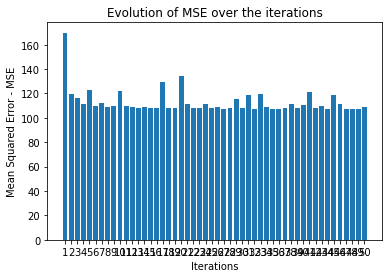

In [17]:
# Visualize the mean squared error
x = ['{0}'.format(i+1) for i in range(50)]
plt.bar(x,mse)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error - MSE')
plt.title('Evolution of MSE over the iterations')
plt.show()

In [18]:
# Mean of the MSE's
mean_partA = np.array(mse).mean()
print("Mean of the MSE's:",mean_partA)

# Standard deviation of the MSE'S
std_partA = np.array(mse).std()
print("Standard deviation of the MSE's:",std_partA)

Mean of the MSE's: 112.85093267665532
Standard deviation of the MSE's: 10.105960948369903


## B. Reporting mean of the mean squared error using normalized version of the data

In [19]:
# Normalize the data
X_norm = (X-X.mean())/X.std()
X_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [20]:
mse2 = [] # Initializing the list for appending the MSE upon each iteration
for i in range(50):
    mse2.append(MSE(model, X_norm, Y, 50))

-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 6ms/step - loss: 109.6688 - val_loss: 139.6484
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 115.6659 - val_loss: 116.1681
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 110.3652 - val_loss: 111.6242
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 108.7742 - val_loss: 114.2082
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 109.6634 - val_loss: 111.1800
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 108.1076 - val_loss: 112.2398
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 107.3644 - val_loss: 111.9600
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 110.7584 - val_loss: 112.6869
Epoch 9/50
16/16 [==============================] - 0s 4ms/step -

Epoch 28/50
16/16 [==============================] - 0s 3ms/step - loss: 109.3384 - val_loss: 115.9760
Epoch 29/50
16/16 [==============================] - 0s 5ms/step - loss: 110.3853 - val_loss: 129.0391
Epoch 30/50
16/16 [==============================] - 0s 5ms/step - loss: 114.2439 - val_loss: 117.2732
Epoch 31/50
16/16 [==============================] - 0s 5ms/step - loss: 109.3906 - val_loss: 114.2142
Epoch 32/50
16/16 [==============================] - 0s 4ms/step - loss: 108.8512 - val_loss: 112.0290
Epoch 33/50
16/16 [==============================] - 0s 4ms/step - loss: 108.1504 - val_loss: 113.0490
Epoch 34/50
16/16 [==============================] - 0s 4ms/step - loss: 107.4689 - val_loss: 110.6789
Epoch 35/50
16/16 [==============================] - 0s 5ms/step - loss: 108.2076 - val_loss: 114.0997
Epoch 36/50
16/16 [==============================] - 0s 4ms/step - loss: 108.8931 - val_loss: 111.4967
Epoch 37/50
16/16 [==============================] - 0s 3ms/step - loss: 

16/16 [==============================] - 0s 5ms/step - loss: 107.9507 - val_loss: 111.9294
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 110.6126 - val_loss: 117.9709
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 108.7370 - val_loss: 113.7435
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 109.5464 - val_loss: 111.6583
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 108.3142 - val_loss: 112.6483
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 107.1749 - val_loss: 111.7486
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 108.5682 - val_loss: 113.8631
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 107.3548 - val_loss: 112.3642
Epoch 12/50
16/16 [==============================] - 0s 4ms/step - loss: 107.4211 - val_loss: 114.4985
Epoch 13/50
16/16 [==============================] - 0s 5ms/step - loss: 106.4677 - val_lo

Epoch 33/50
16/16 [==============================] - 0s 6ms/step - loss: 61.9289 - val_loss: 67.6192
Epoch 34/50
16/16 [==============================] - 0s 4ms/step - loss: 63.8755 - val_loss: 64.2080
Epoch 35/50
16/16 [==============================] - 0s 5ms/step - loss: 61.8175 - val_loss: 64.9316
Epoch 36/50
16/16 [==============================] - 0s 5ms/step - loss: 61.1107 - val_loss: 61.8672
Epoch 37/50
16/16 [==============================] - 0s 5ms/step - loss: 60.3576 - val_loss: 62.2173
Epoch 38/50
16/16 [==============================] - 0s 5ms/step - loss: 61.3493 - val_loss: 61.1175
Epoch 39/50
16/16 [==============================] - 0s 4ms/step - loss: 60.0274 - val_loss: 61.1905
Epoch 40/50
16/16 [==============================] - 0s 4ms/step - loss: 60.2738 - val_loss: 60.9310
Epoch 41/50
16/16 [==============================] - 0s 5ms/step - loss: 60.6369 - val_loss: 64.3605
Epoch 42/50
16/16 [==============================] - 0s 6ms/step - loss: 59.6788 - val_loss

Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 57.2311 - val_loss: 62.4160
Epoch 12/50
16/16 [==============================] - 0s 4ms/step - loss: 55.9645 - val_loss: 53.1213
Epoch 13/50
16/16 [==============================] - 0s 5ms/step - loss: 53.3226 - val_loss: 52.0605
Epoch 14/50
16/16 [==============================] - 0s 5ms/step - loss: 53.4934 - val_loss: 59.1962
Epoch 15/50
16/16 [==============================] - 0s 4ms/step - loss: 56.0364 - val_loss: 53.6683
Epoch 16/50
16/16 [==============================] - 0s 5ms/step - loss: 55.6859 - val_loss: 51.8579
Epoch 17/50
16/16 [==============================] - 0s 6ms/step - loss: 53.8357 - val_loss: 51.4505
Epoch 18/50
16/16 [==============================] - 0s 5ms/step - loss: 56.0091 - val_loss: 51.3419
Epoch 19/50
16/16 [==============================] - 0s 5ms/step - loss: 53.5040 - val_loss: 51.6880
Epoch 20/50
16/16 [==============================] - 0s 5ms/step - loss: 53.2542 - val_loss

16/16 [==============================] - 0s 4ms/step - loss: 54.7645 - val_loss: 48.4884
Epoch 41/50
16/16 [==============================] - 0s 4ms/step - loss: 51.1792 - val_loss: 48.5129
Epoch 42/50
16/16 [==============================] - 0s 5ms/step - loss: 51.2457 - val_loss: 50.5092
Epoch 43/50
16/16 [==============================] - 0s 6ms/step - loss: 51.2660 - val_loss: 49.5569
Epoch 44/50
16/16 [==============================] - 0s 4ms/step - loss: 51.9022 - val_loss: 50.4601
Epoch 45/50
16/16 [==============================] - 0s 3ms/step - loss: 50.6142 - val_loss: 49.8077
Epoch 46/50
16/16 [==============================] - 0s 3ms/step - loss: 52.8198 - val_loss: 51.5852
Epoch 47/50
16/16 [==============================] - 0s 4ms/step - loss: 51.4817 - val_loss: 49.5681
Epoch 48/50
16/16 [==============================] - 0s 5ms/step - loss: 52.7999 - val_loss: 48.3207
Epoch 49/50
16/16 [==============================] - 0s 5ms/step - loss: 51.4521 - val_loss: 48.4467
Ep

Epoch 18/50
16/16 [==============================] - 0s 5ms/step - loss: 49.9396 - val_loss: 46.5265
Epoch 19/50
16/16 [==============================] - 0s 5ms/step - loss: 50.3135 - val_loss: 46.7143
Epoch 20/50
16/16 [==============================] - 0s 5ms/step - loss: 50.9253 - val_loss: 46.5973
Epoch 21/50
16/16 [==============================] - 0s 5ms/step - loss: 49.9168 - val_loss: 46.3091
Epoch 22/50
16/16 [==============================] - 0s 5ms/step - loss: 50.8272 - val_loss: 50.6573
Epoch 23/50
16/16 [==============================] - 0s 4ms/step - loss: 50.3770 - val_loss: 47.8926
Epoch 24/50
16/16 [==============================] - 0s 5ms/step - loss: 50.8751 - val_loss: 46.6109
Epoch 25/50
16/16 [==============================] - 0s 4ms/step - loss: 49.3305 - val_loss: 46.2050
Epoch 26/50
16/16 [==============================] - 0s 4ms/step - loss: 49.9798 - val_loss: 47.8295
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 49.5702 - val_loss

16/16 [==============================] - 0s 3ms/step - loss: 50.2652 - val_loss: 46.5555
Epoch 48/50
16/16 [==============================] - 0s 5ms/step - loss: 51.4554 - val_loss: 47.5300
Epoch 49/50
16/16 [==============================] - 0s 5ms/step - loss: 51.0438 - val_loss: 47.3231
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 52.8110 - val_loss: 53.8300
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 51.6019 - val_loss: 46.0925
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 51.2643 - val_loss: 51.0809
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 50.1875 - val_loss: 45.3841
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 49.3431 - val_loss: 46.5476
Epoch 6/50
16/16 [=======

16/16 [==============================] - 0s 4ms/step - loss: 51.8549 - val_loss: 48.6269
Epoch 26/50
16/16 [==============================] - 0s 4ms/step - loss: 48.8997 - val_loss: 44.5808
Epoch 27/50
16/16 [==============================] - 0s 5ms/step - loss: 49.3890 - val_loss: 46.3599
Epoch 28/50
16/16 [==============================] - 0s 4ms/step - loss: 48.4835 - val_loss: 44.7535
Epoch 29/50
16/16 [==============================] - 0s 5ms/step - loss: 49.6863 - val_loss: 44.7177
Epoch 30/50
16/16 [==============================] - 0s 5ms/step - loss: 49.1196 - val_loss: 44.9570
Epoch 31/50
16/16 [==============================] - 0s 4ms/step - loss: 49.3532 - val_loss: 44.6670
Epoch 32/50
16/16 [==============================] - 0s 5ms/step - loss: 48.5562 - val_loss: 45.1638
Epoch 33/50
16/16 [==============================] - 0s 4ms/step - loss: 51.2372 - val_loss: 44.8106
Epoch 34/50
16/16 [==============================] - 0s 5ms/step - loss: 50.5558 - val_loss: 45.4598
Ep

Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 49.9752 - val_loss: 44.7935
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 48.6967 - val_loss: 44.3847
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 48.7957 - val_loss: 44.8052
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 48.8306 - val_loss: 45.4480
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 49.1938 - val_loss: 45.3185
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 49.2466 - val_loss: 48.5632
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 54.7081 - val_loss: 50.4209
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 50.5346 - val_loss: 44.5604
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 48.5026 - val_loss: 45.7774
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 50.2475 - val_loss: 52.07

16/16 [==============================] - 0s 5ms/step - loss: 52.1697 - val_loss: 44.4100
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 49.9950 - val_loss: 45.7531
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 50.0504 - val_loss: 44.6702
Epoch 35/50
16/16 [==============================] - 0s 5ms/step - loss: 48.2288 - val_loss: 44.1029
Epoch 36/50
16/16 [==============================] - 0s 4ms/step - loss: 49.4947 - val_loss: 46.5154
Epoch 37/50
16/16 [==============================] - 0s 4ms/step - loss: 48.7968 - val_loss: 44.6495
Epoch 38/50
16/16 [==============================] - 0s 5ms/step - loss: 48.6935 - val_loss: 44.2807
Epoch 39/50
16/16 [==============================] - 0s 6ms/step - loss: 53.8204 - val_loss: 49.0548
Epoch 40/50
16/16 [==============================] - 0s 5ms/step - loss: 52.1433 - val_loss: 44.4027
Epoch 41/50
16/16 [==============================] - 0s 5ms/step - loss: 50.3567 - val_loss: 49.2221
Ep

16/16 [==============================] - 0s 6ms/step - loss: 48.6299 - val_loss: 43.9938
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 49.1283 - val_loss: 44.5066
Epoch 12/50
16/16 [==============================] - 0s 4ms/step - loss: 49.4929 - val_loss: 44.1692
Epoch 13/50
16/16 [==============================] - 0s 5ms/step - loss: 49.1226 - val_loss: 44.8611
Epoch 14/50
16/16 [==============================] - 0s 6ms/step - loss: 49.1521 - val_loss: 44.3691
Epoch 15/50
16/16 [==============================] - 0s 5ms/step - loss: 48.3457 - val_loss: 44.1341
Epoch 16/50
16/16 [==============================] - 0s 5ms/step - loss: 48.7325 - val_loss: 44.3718
Epoch 17/50
16/16 [==============================] - 0s 4ms/step - loss: 48.1513 - val_loss: 47.5700
Epoch 18/50
16/16 [==============================] - 0s 6ms/step - loss: 50.2945 - val_loss: 46.7673
Epoch 19/50
16/16 [==============================] - 0s 4ms/step - loss: 51.6340 - val_loss: 44.2727
Ep

16/16 [==============================] - 0s 6ms/step - loss: 48.3023 - val_loss: 47.5529
Epoch 40/50
16/16 [==============================] - 0s 5ms/step - loss: 49.4718 - val_loss: 43.8724
Epoch 41/50
16/16 [==============================] - 0s 5ms/step - loss: 48.8345 - val_loss: 46.2368
Epoch 42/50
16/16 [==============================] - 0s 5ms/step - loss: 49.9584 - val_loss: 43.6956
Epoch 43/50
16/16 [==============================] - 0s 5ms/step - loss: 48.4983 - val_loss: 46.4024
Epoch 44/50
16/16 [==============================] - 0s 3ms/step - loss: 48.7183 - val_loss: 45.0262
Epoch 45/50
16/16 [==============================] - 0s 4ms/step - loss: 49.1140 - val_loss: 46.7119
Epoch 46/50
16/16 [==============================] - 0s 4ms/step - loss: 48.8968 - val_loss: 44.1355
Epoch 47/50
16/16 [==============================] - 0s 4ms/step - loss: 50.3491 - val_loss: 49.1821
Epoch 48/50
16/16 [==============================] - 0s 5ms/step - loss: 53.3667 - val_loss: 44.3783
Ep

16/16 [==============================] - 0s 6ms/step - loss: 49.8036 - val_loss: 48.9001
Epoch 18/50
16/16 [==============================] - 0s 5ms/step - loss: 49.4983 - val_loss: 44.4028
Epoch 19/50
16/16 [==============================] - 0s 6ms/step - loss: 48.3242 - val_loss: 43.8679
Epoch 20/50
16/16 [==============================] - 0s 5ms/step - loss: 48.6968 - val_loss: 44.1983
Epoch 21/50
16/16 [==============================] - 0s 4ms/step - loss: 49.3045 - val_loss: 43.7745
Epoch 22/50
16/16 [==============================] - 0s 5ms/step - loss: 48.1166 - val_loss: 44.7677
Epoch 23/50
16/16 [==============================] - 0s 5ms/step - loss: 49.2439 - val_loss: 47.3972
Epoch 24/50
16/16 [==============================] - 0s 6ms/step - loss: 50.0340 - val_loss: 44.1258
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 48.6638 - val_loss: 44.4331
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 48.7555 - val_loss: 43.7358
Ep

16/16 [==============================] - 0s 5ms/step - loss: 49.7801 - val_loss: 48.1759
Epoch 47/50
16/16 [==============================] - 0s 6ms/step - loss: 52.9822 - val_loss: 45.7745
Epoch 48/50
16/16 [==============================] - 0s 6ms/step - loss: 50.0590 - val_loss: 53.7337
Epoch 49/50
16/16 [==============================] - 0s 5ms/step - loss: 50.3750 - val_loss: 46.1262
Epoch 50/50
10/10 [==============================] - 0s 1ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 50.8137 - val_loss: 44.4516
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 49.0267 - val_loss: 44.8285
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 49.2041 - val_loss: 44.4204
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 48.5092 - val_loss: 44.1291
Epoch 5/50
16/16 [======

16/16 [==============================] - 0s 4ms/step - loss: 49.5132 - val_loss: 49.9467
Epoch 25/50
16/16 [==============================] - 0s 4ms/step - loss: 51.8188 - val_loss: 47.2826
Epoch 26/50
16/16 [==============================] - 0s 4ms/step - loss: 48.5472 - val_loss: 44.5256
Epoch 27/50
16/16 [==============================] - 0s 6ms/step - loss: 48.3985 - val_loss: 44.5511
Epoch 28/50
16/16 [==============================] - 0s 5ms/step - loss: 49.0280 - val_loss: 44.1317
Epoch 29/50
16/16 [==============================] - 0s 4ms/step - loss: 48.4954 - val_loss: 43.8098
Epoch 30/50
16/16 [==============================] - 0s 4ms/step - loss: 50.2060 - val_loss: 44.0835
Epoch 31/50
16/16 [==============================] - 0s 5ms/step - loss: 49.2600 - val_loss: 47.0591
Epoch 32/50
16/16 [==============================] - 0s 5ms/step - loss: 50.5673 - val_loss: 44.0562
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 49.7075 - val_loss: 45.9971
Ep

Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 48.2657 - val_loss: 44.9989
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 48.5579 - val_loss: 44.0994
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 50.2535 - val_loss: 46.0658
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 49.8520 - val_loss: 43.9602
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 49.0812 - val_loss: 44.4492
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 48.8170 - val_loss: 44.3094
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 48.6820 - val_loss: 44.3155
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 48.3822 - val_loss: 44.1106
Epoch 10/50
16/16 [==============================] - 0s 6ms/step - loss: 50.3312 - val_loss: 52.2770
Epoch 11/50
16/16 [==============================] - 0s 6ms/step - loss: 48.1554 - val_loss: 43.916

16/16 [==============================] - 0s 6ms/step - loss: 49.2679 - val_loss: 44.1807
Epoch 32/50
16/16 [==============================] - 0s 5ms/step - loss: 48.9068 - val_loss: 44.3765
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 48.7622 - val_loss: 43.9941
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 48.6459 - val_loss: 45.6860
Epoch 35/50
16/16 [==============================] - 0s 4ms/step - loss: 47.7963 - val_loss: 44.3813
Epoch 36/50
16/16 [==============================] - 0s 4ms/step - loss: 48.3213 - val_loss: 44.5047
Epoch 37/50
16/16 [==============================] - 0s 5ms/step - loss: 49.1287 - val_loss: 44.3992
Epoch 38/50
16/16 [==============================] - 0s 5ms/step - loss: 48.7042 - val_loss: 44.1860
Epoch 39/50
16/16 [==============================] - 0s 5ms/step - loss: 48.5482 - val_loss: 46.8039
Epoch 40/50
16/16 [==============================] - 0s 5ms/step - loss: 49.6161 - val_loss: 45.6523
Ep

Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 48.5317 - val_loss: 44.0898
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 47.9767 - val_loss: 44.0939
Epoch 11/50
16/16 [==============================] - 0s 4ms/step - loss: 51.1179 - val_loss: 44.4809
Epoch 12/50
16/16 [==============================] - 0s 6ms/step - loss: 50.9111 - val_loss: 44.9678
Epoch 13/50
16/16 [==============================] - 0s 6ms/step - loss: 48.9035 - val_loss: 43.9958
Epoch 14/50
16/16 [==============================] - 0s 7ms/step - loss: 48.3013 - val_loss: 43.7177
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 48.6742 - val_loss: 43.8495
Epoch 16/50
16/16 [==============================] - 0s 4ms/step - loss: 48.3354 - val_loss: 43.9992
Epoch 17/50
16/16 [==============================] - 0s 4ms/step - loss: 49.1585 - val_loss: 44.4664
Epoch 18/50
16/16 [==============================] - 0s 4ms/step - loss: 49.7138 - val_loss:

16/16 [==============================] - 0s 4ms/step - loss: 49.0838 - val_loss: 44.6869
Epoch 39/50
16/16 [==============================] - 0s 4ms/step - loss: 52.8985 - val_loss: 45.4186
Epoch 40/50
16/16 [==============================] - 0s 4ms/step - loss: 49.6192 - val_loss: 44.4960
Epoch 41/50
16/16 [==============================] - 0s 4ms/step - loss: 49.1184 - val_loss: 45.8769
Epoch 42/50
16/16 [==============================] - 0s 4ms/step - loss: 49.8930 - val_loss: 44.5355
Epoch 43/50
16/16 [==============================] - 0s 4ms/step - loss: 49.0916 - val_loss: 43.6231
Epoch 44/50
16/16 [==============================] - 0s 4ms/step - loss: 49.0519 - val_loss: 44.1712
Epoch 45/50
16/16 [==============================] - 0s 4ms/step - loss: 48.1212 - val_loss: 44.0825
Epoch 46/50
16/16 [==============================] - 0s 4ms/step - loss: 50.3357 - val_loss: 44.0599
Epoch 47/50
16/16 [==============================] - 0s 4ms/step - loss: 48.7575 - val_loss: 44.4164
Ep

Epoch 16/50
16/16 [==============================] - 0s 6ms/step - loss: 48.9301 - val_loss: 44.4557
Epoch 17/50
16/16 [==============================] - 0s 5ms/step - loss: 49.4833 - val_loss: 44.2929
Epoch 18/50
16/16 [==============================] - 0s 5ms/step - loss: 49.4320 - val_loss: 44.0231
Epoch 19/50
16/16 [==============================] - 0s 4ms/step - loss: 48.8112 - val_loss: 45.0231
Epoch 20/50
16/16 [==============================] - 0s 4ms/step - loss: 48.3762 - val_loss: 44.7367
Epoch 21/50
16/16 [==============================] - 0s 5ms/step - loss: 48.4292 - val_loss: 44.7439
Epoch 22/50
16/16 [==============================] - 0s 4ms/step - loss: 48.5787 - val_loss: 43.7063
Epoch 23/50
16/16 [==============================] - 0s 5ms/step - loss: 49.1439 - val_loss: 43.8123
Epoch 24/50
16/16 [==============================] - 0s 5ms/step - loss: 49.5843 - val_loss: 48.6454
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 48.6543 - val_loss

16/16 [==============================] - 0s 4ms/step - loss: 48.3166 - val_loss: 44.6257
Epoch 46/50
16/16 [==============================] - 0s 4ms/step - loss: 48.1911 - val_loss: 46.6781
Epoch 47/50
16/16 [==============================] - 0s 3ms/step - loss: 48.5791 - val_loss: 45.3182
Epoch 48/50
16/16 [==============================] - 0s 2ms/step - loss: 51.3987 - val_loss: 46.8956
Epoch 49/50
16/16 [==============================] - 0s 4ms/step - loss: 49.6558 - val_loss: 43.8534
Epoch 50/50
10/10 [==============================] - 0s 1ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 6ms/step - loss: 48.2682 - val_loss: 45.8080
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 48.8193 - val_loss: 44.2764
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 48.3664 - val_loss: 44.1787
Epoch 4/50
16/16 [=====

16/16 [==============================] - 0s 5ms/step - loss: 49.6664 - val_loss: 43.7927
Epoch 24/50
16/16 [==============================] - 0s 5ms/step - loss: 48.3213 - val_loss: 44.3577
Epoch 25/50
16/16 [==============================] - 0s 5ms/step - loss: 48.4881 - val_loss: 43.8463
Epoch 26/50
16/16 [==============================] - 0s 5ms/step - loss: 48.0097 - val_loss: 47.3360
Epoch 27/50
16/16 [==============================] - 0s 5ms/step - loss: 51.1733 - val_loss: 47.6800
Epoch 28/50
16/16 [==============================] - 0s 4ms/step - loss: 49.1142 - val_loss: 47.1531
Epoch 29/50
16/16 [==============================] - 0s 5ms/step - loss: 48.5463 - val_loss: 46.6750
Epoch 30/50
16/16 [==============================] - 0s 5ms/step - loss: 49.1131 - val_loss: 44.1885
Epoch 31/50
16/16 [==============================] - 0s 4ms/step - loss: 51.0800 - val_loss: 48.4426
Epoch 32/50
16/16 [==============================] - 0s 4ms/step - loss: 51.7932 - val_loss: 45.2136
Ep

Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 49.4439 - val_loss: 50.2195
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 49.9157 - val_loss: 46.1376
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 48.9032 - val_loss: 45.0930
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 49.0032 - val_loss: 47.4478
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 49.4166 - val_loss: 44.0306
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 48.1089 - val_loss: 44.5386
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 49.4876 - val_loss: 44.1266
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 48.8713 - val_loss: 44.4324
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 50.8259 - val_loss: 44.1179
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 51.7166 - val_loss: 44.0655

16/16 [==============================] - 0s 4ms/step - loss: 48.8326 - val_loss: 44.4932
Epoch 31/50
16/16 [==============================] - 0s 5ms/step - loss: 48.6064 - val_loss: 44.8516
Epoch 32/50
16/16 [==============================] - 0s 6ms/step - loss: 48.2747 - val_loss: 45.1399
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 49.6515 - val_loss: 52.3909
Epoch 34/50
16/16 [==============================] - 0s 4ms/step - loss: 52.5249 - val_loss: 44.1435
Epoch 35/50
16/16 [==============================] - 0s 5ms/step - loss: 48.3060 - val_loss: 45.8081
Epoch 36/50
16/16 [==============================] - 0s 5ms/step - loss: 49.7690 - val_loss: 44.0542
Epoch 37/50
16/16 [==============================] - 0s 5ms/step - loss: 48.3204 - val_loss: 45.0109
Epoch 38/50
16/16 [==============================] - 0s 5ms/step - loss: 48.6074 - val_loss: 44.6973
Epoch 39/50
16/16 [==============================] - 0s 3ms/step - loss: 49.9908 - val_loss: 43.6353
Ep

Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 48.7452 - val_loss: 45.7318
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 49.2201 - val_loss: 45.9732
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 48.4934 - val_loss: 44.1551
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 48.8766 - val_loss: 45.7474
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 49.8135 - val_loss: 44.0975
Epoch 13/50
16/16 [==============================] - 0s 5ms/step - loss: 52.8288 - val_loss: 47.9712
Epoch 14/50
16/16 [==============================] - 0s 5ms/step - loss: 52.4548 - val_loss: 47.0402
Epoch 15/50
16/16 [==============================] - 0s 5ms/step - loss: 52.5823 - val_loss: 45.6215
Epoch 16/50
16/16 [==============================] - 0s 5ms/step - loss: 49.2915 - val_loss: 44.0063
Epoch 17/50
16/16 [==============================] - 0s 6ms/step - loss: 48.7002 - val_loss: 

16/16 [==============================] - 0s 4ms/step - loss: 48.7714 - val_loss: 45.0496
Epoch 38/50
16/16 [==============================] - 0s 5ms/step - loss: 50.0313 - val_loss: 47.2220
Epoch 39/50
16/16 [==============================] - 0s 5ms/step - loss: 49.4678 - val_loss: 45.4973
Epoch 40/50
16/16 [==============================] - 0s 4ms/step - loss: 49.5659 - val_loss: 45.3551
Epoch 41/50
16/16 [==============================] - 0s 5ms/step - loss: 48.6031 - val_loss: 44.2496
Epoch 42/50
16/16 [==============================] - 0s 4ms/step - loss: 48.6506 - val_loss: 44.2259
Epoch 43/50
16/16 [==============================] - 0s 5ms/step - loss: 48.9119 - val_loss: 44.7138
Epoch 44/50
16/16 [==============================] - 0s 4ms/step - loss: 48.1615 - val_loss: 43.9586
Epoch 45/50
16/16 [==============================] - 0s 4ms/step - loss: 48.5156 - val_loss: 44.9021
Epoch 46/50
16/16 [==============================] - 0s 5ms/step - loss: 48.2835 - val_loss: 44.1015
Ep

16/16 [==============================] - 0s 4ms/step - loss: 48.2845 - val_loss: 50.9037
Epoch 16/50
16/16 [==============================] - 0s 4ms/step - loss: 49.4319 - val_loss: 47.0615
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 50.5337 - val_loss: 44.7227
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 51.2385 - val_loss: 47.6881
Epoch 19/50
16/16 [==============================] - 0s 4ms/step - loss: 49.4439 - val_loss: 46.4162
Epoch 20/50
16/16 [==============================] - 0s 4ms/step - loss: 48.0734 - val_loss: 44.8974
Epoch 21/50
16/16 [==============================] - 0s 6ms/step - loss: 49.0830 - val_loss: 46.9720
Epoch 22/50
16/16 [==============================] - 0s 5ms/step - loss: 50.7812 - val_loss: 44.4582
Epoch 23/50
16/16 [==============================] - 0s 4ms/step - loss: 49.3615 - val_loss: 45.2644
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 48.7911 - val_loss: 44.3594
Ep

16/16 [==============================] - 0s 3ms/step - loss: 48.4621 - val_loss: 44.7184
Epoch 45/50
16/16 [==============================] - 0s 4ms/step - loss: 48.2153 - val_loss: 44.8636
Epoch 46/50
16/16 [==============================] - 0s 4ms/step - loss: 49.2187 - val_loss: 44.0396
Epoch 47/50
16/16 [==============================] - 0s 5ms/step - loss: 48.3562 - val_loss: 44.9918
Epoch 48/50
16/16 [==============================] - 0s 4ms/step - loss: 50.4172 - val_loss: 50.0608
Epoch 49/50
16/16 [==============================] - 0s 5ms/step - loss: 49.4071 - val_loss: 45.3023
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 48.4171 - val_loss: 47.0118
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 48.8052 - val_loss: 44.4575
Epoch 3/50
16/16 [====

16/16 [==============================] - 0s 5ms/step - loss: 48.7937 - val_loss: 43.9539
Epoch 23/50
16/16 [==============================] - 0s 4ms/step - loss: 48.9809 - val_loss: 44.3698
Epoch 24/50
16/16 [==============================] - 0s 4ms/step - loss: 48.6392 - val_loss: 45.0945
Epoch 25/50
16/16 [==============================] - 0s 4ms/step - loss: 49.0253 - val_loss: 45.2990
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 48.5523 - val_loss: 45.7686
Epoch 27/50
16/16 [==============================] - 0s 4ms/step - loss: 48.4649 - val_loss: 44.7787
Epoch 28/50
16/16 [==============================] - 0s 4ms/step - loss: 49.3108 - val_loss: 45.4632
Epoch 29/50
16/16 [==============================] - 0s 4ms/step - loss: 50.2236 - val_loss: 45.7530
Epoch 30/50
16/16 [==============================] - 0s 4ms/step - loss: 48.4842 - val_loss: 44.0837
Epoch 31/50
16/16 [==============================] - 0s 4ms/step - loss: 48.7676 - val_loss: 45.1689
Ep

Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 49.2498 - val_loss: 44.8631
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 48.2174 - val_loss: 47.0995
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 48.4603 - val_loss: 44.5240
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 47.8145 - val_loss: 44.4888
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 50.0106 - val_loss: 46.6524
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 49.6450 - val_loss: 49.7115
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 49.8371 - val_loss: 44.2866
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 48.3026 - val_loss: 44.0654
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 48.2344 - val_loss: 43.9992
Epoch 10/50
16/16 [==============================] - 0s 6ms/step - loss: 49.1361 - val_loss: 44.2026

16/16 [==============================] - 0s 5ms/step - loss: 48.6750 - val_loss: 43.8255
Epoch 31/50
16/16 [==============================] - 0s 5ms/step - loss: 48.5542 - val_loss: 44.0196
Epoch 32/50
16/16 [==============================] - 0s 5ms/step - loss: 49.9304 - val_loss: 44.1528
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 49.9741 - val_loss: 45.3724
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 49.2445 - val_loss: 45.6285
Epoch 35/50
16/16 [==============================] - 0s 4ms/step - loss: 50.6978 - val_loss: 45.0695
Epoch 36/50
16/16 [==============================] - 0s 4ms/step - loss: 50.7502 - val_loss: 45.0533
Epoch 37/50
16/16 [==============================] - 0s 6ms/step - loss: 48.6271 - val_loss: 44.2933
Epoch 38/50
16/16 [==============================] - 0s 4ms/step - loss: 49.0752 - val_loss: 43.8583
Epoch 39/50
16/16 [==============================] - 0s 4ms/step - loss: 48.8376 - val_loss: 46.2985
Ep

#### Reporting Mean and Standard Deviation of the Mean Squared Errors

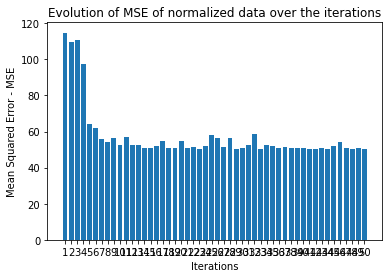

In [21]:
# Visualize the mean squared error
x = ['{0}'.format(i+1) for i in range(50)]
plt.bar(x,mse2)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error - MSE')
plt.title('Evolution of MSE of normalized data over the iterations')
plt.show()

In [22]:
# Mean of the MSE's
mean_partB = np.array(mse2).mean()
print("Mean of the MSE's:",mean_partB)

# Standard deviation of the MSE'S
std_partB = np.array(mse2).std()
print("Standard deviation of the MSE's:",std_partB)

Mean of the MSE's: 57.2759672337988
Standard deviation of the MSE's: 15.37555302461574


#### Comparison between the Mean of the Mean Squared Errors when unnormalized and normalized data are fed to train the model

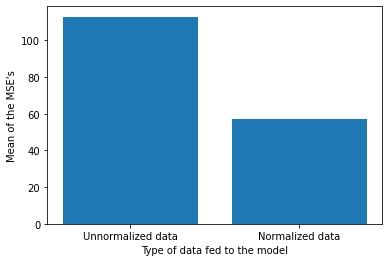

In [23]:
plt.bar(['Unnormalized data','Normalized data'],[mean_partA,mean_partB])
plt.xlabel('Type of data fed to the model')
plt.ylabel("Mean of the MSE's")
plt.show()

In [24]:
# Difference between both mean of the MSE's
mean_partB-mean_partA

-55.57496544285652

Thus it can be observed that on making the data normalized, the error reduces and  accuracy of the prediction incresases.

## C. Reporting mean of the MSE using normalized version of the data by increasing the number of epochs to 100

In [25]:
mse3 = [] # Initializing the list for appending the MSE upon each iteration
for i in range(50):
    mse3.append(MSE(model, X_norm, Y, 100))

-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/100
16/16 [==============================] - 0s 5ms/step - loss: 48.5393 - val_loss: 43.9296
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 48.6071 - val_loss: 44.3041
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 48.9601 - val_loss: 44.2068
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 49.5325 - val_loss: 48.0857
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 49.4528 - val_loss: 44.0241
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 49.6271 - val_loss: 45.7502
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 48.7767 - val_loss: 44.2140
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 48.5065 - val_loss: 45.7665
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 

16/16 [==============================] - 0s 4ms/step - loss: 48.7257 - val_loss: 44.4208
Epoch 81/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3864 - val_loss: 43.8365
Epoch 82/100
16/16 [==============================] - 0s 6ms/step - loss: 48.9120 - val_loss: 44.1086
Epoch 83/100
16/16 [==============================] - 0s 4ms/step - loss: 48.8028 - val_loss: 44.4043
Epoch 84/100
16/16 [==============================] - 0s 6ms/step - loss: 49.3083 - val_loss: 46.4179
Epoch 85/100
16/16 [==============================] - 0s 5ms/step - loss: 50.7078 - val_loss: 44.0375
Epoch 86/100
16/16 [==============================] - 0s 4ms/step - loss: 48.4736 - val_loss: 43.9709
Epoch 87/100
16/16 [==============================] - 0s 5ms/step - loss: 47.8716 - val_loss: 44.7477
Epoch 88/100
16/16 [==============================] - 0s 5ms/step - loss: 49.1938 - val_loss: 45.0681
Epoch 89/100
16/16 [==============================] - 0s 4ms/step - loss: 48.1890 - val_loss: 4

Epoch 59/100
16/16 [==============================] - 0s 4ms/step - loss: 49.4209 - val_loss: 44.0138
Epoch 60/100
16/16 [==============================] - 0s 5ms/step - loss: 48.4525 - val_loss: 45.1984
Epoch 61/100
16/16 [==============================] - 0s 4ms/step - loss: 49.1000 - val_loss: 44.3386
Epoch 62/100
16/16 [==============================] - 0s 5ms/step - loss: 50.4807 - val_loss: 44.3572
Epoch 63/100
16/16 [==============================] - 0s 5ms/step - loss: 49.4625 - val_loss: 44.2112
Epoch 64/100
16/16 [==============================] - 0s 5ms/step - loss: 48.5742 - val_loss: 44.0368
Epoch 65/100
16/16 [==============================] - 0s 4ms/step - loss: 50.6078 - val_loss: 47.0594
Epoch 66/100
16/16 [==============================] - 0s 4ms/step - loss: 49.2658 - val_loss: 45.7913
Epoch 67/100
16/16 [==============================] - 0s 4ms/step - loss: 47.7589 - val_loss: 44.1067
Epoch 68/100
16/16 [==============================] - 0s 4ms/step - loss: 48.4268 

16/16 [==============================] - 0s 3ms/step - loss: 48.3360 - val_loss: 44.7296
Epoch 38/100
16/16 [==============================] - 0s 5ms/step - loss: 48.9279 - val_loss: 44.4541
Epoch 39/100
16/16 [==============================] - 0s 2ms/step - loss: 48.4029 - val_loss: 44.1359
Epoch 40/100
16/16 [==============================] - 0s 3ms/step - loss: 48.2878 - val_loss: 45.2294
Epoch 41/100
16/16 [==============================] - 0s 3ms/step - loss: 49.1110 - val_loss: 43.9623
Epoch 42/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1671 - val_loss: 46.3364
Epoch 43/100
16/16 [==============================] - 0s 4ms/step - loss: 49.7378 - val_loss: 45.8754
Epoch 44/100
16/16 [==============================] - 0s 5ms/step - loss: 48.7163 - val_loss: 44.3154
Epoch 45/100
16/16 [==============================] - 0s 4ms/step - loss: 48.1634 - val_loss: 44.3103
Epoch 46/100
16/16 [==============================] - 0s 3ms/step - loss: 48.4578 - val_loss: 4

Epoch 16/100
16/16 [==============================] - 0s 3ms/step - loss: 50.1693 - val_loss: 44.4328
Epoch 17/100
16/16 [==============================] - 0s 5ms/step - loss: 49.5702 - val_loss: 46.2010
Epoch 18/100
16/16 [==============================] - 0s 5ms/step - loss: 49.9103 - val_loss: 44.4308
Epoch 19/100
16/16 [==============================] - 0s 5ms/step - loss: 48.4723 - val_loss: 44.5270
Epoch 20/100
16/16 [==============================] - 0s 4ms/step - loss: 48.9280 - val_loss: 44.9975
Epoch 21/100
16/16 [==============================] - 0s 5ms/step - loss: 48.9489 - val_loss: 44.0206
Epoch 22/100
16/16 [==============================] - 0s 4ms/step - loss: 47.9309 - val_loss: 45.8602
Epoch 23/100
16/16 [==============================] - 0s 4ms/step - loss: 47.8567 - val_loss: 45.4550
Epoch 24/100
16/16 [==============================] - 0s 5ms/step - loss: 49.0054 - val_loss: 46.8280
Epoch 25/100
16/16 [==============================] - 0s 5ms/step - loss: 50.2927 

16/16 [==============================] - 0s 5ms/step - loss: 48.8110 - val_loss: 45.0989
Epoch 97/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0567 - val_loss: 45.2225
Epoch 98/100
16/16 [==============================] - 0s 4ms/step - loss: 47.6524 - val_loss: 45.9836
Epoch 99/100
16/16 [==============================] - 0s 5ms/step - loss: 48.6657 - val_loss: 44.9669
Epoch 100/100
10/10 [==============================] - 0s 0s/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/100
16/16 [==============================] - 0s 6ms/step - loss: 48.1992 - val_loss: 45.1809
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 49.2380 - val_loss: 44.8807
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 49.6877 - val_loss: 45.4564
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 48.8598 - val_loss: 47.3125
Epoch 5/100
16/1

Epoch 75/100
16/16 [==============================] - 0s 5ms/step - loss: 49.7023 - val_loss: 44.7948
Epoch 76/100
16/16 [==============================] - 0s 3ms/step - loss: 47.7650 - val_loss: 44.6943
Epoch 77/100
16/16 [==============================] - 0s 4ms/step - loss: 48.1097 - val_loss: 45.5201
Epoch 78/100
16/16 [==============================] - 0s 4ms/step - loss: 48.9525 - val_loss: 45.2521
Epoch 79/100
16/16 [==============================] - 0s 4ms/step - loss: 48.3628 - val_loss: 48.3499
Epoch 80/100
16/16 [==============================] - 0s 4ms/step - loss: 49.5698 - val_loss: 49.3044
Epoch 81/100
16/16 [==============================] - 0s 5ms/step - loss: 52.5629 - val_loss: 44.9040
Epoch 82/100
16/16 [==============================] - 0s 3ms/step - loss: 51.6979 - val_loss: 44.9479
Epoch 83/100
16/16 [==============================] - 0s 4ms/step - loss: 48.0146 - val_loss: 45.3099
Epoch 84/100
16/16 [==============================] - 0s 3ms/step - loss: 48.0339 

16/16 [==============================] - 0s 4ms/step - loss: 49.8637 - val_loss: 45.1337
Epoch 54/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0515 - val_loss: 44.8697
Epoch 55/100
16/16 [==============================] - 0s 3ms/step - loss: 47.8894 - val_loss: 45.1513
Epoch 56/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1258 - val_loss: 45.0039
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 47.5841 - val_loss: 45.8531
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 49.2045 - val_loss: 45.8587
Epoch 59/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3964 - val_loss: 44.7967
Epoch 60/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3835 - val_loss: 46.0350
Epoch 61/100
16/16 [==============================] - 0s 6ms/step - loss: 48.5110 - val_loss: 44.8745
Epoch 62/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1415 - val_loss: 4

Epoch 32/100
16/16 [==============================] - 0s 3ms/step - loss: 47.8404 - val_loss: 45.3429
Epoch 33/100
16/16 [==============================] - 0s 4ms/step - loss: 48.0967 - val_loss: 44.8403
Epoch 34/100
16/16 [==============================] - 0s 4ms/step - loss: 48.3914 - val_loss: 48.4752
Epoch 35/100
16/16 [==============================] - 0s 5ms/step - loss: 50.1563 - val_loss: 46.0640
Epoch 36/100
16/16 [==============================] - 0s 4ms/step - loss: 51.2557 - val_loss: 47.0917
Epoch 37/100
16/16 [==============================] - 0s 5ms/step - loss: 49.1077 - val_loss: 44.8497
Epoch 38/100
16/16 [==============================] - 0s 6ms/step - loss: 47.9104 - val_loss: 44.9977
Epoch 39/100
16/16 [==============================] - 0s 5ms/step - loss: 49.0799 - val_loss: 45.1551
Epoch 40/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7124 - val_loss: 46.0906
Epoch 41/100
16/16 [==============================] - 0s 5ms/step - loss: 48.5055 

16/16 [==============================] - 0s 4ms/step - loss: 50.3386 - val_loss: 45.0819
Epoch 11/100
16/16 [==============================] - 0s 4ms/step - loss: 48.4006 - val_loss: 45.6628
Epoch 12/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1056 - val_loss: 44.7980
Epoch 13/100
16/16 [==============================] - 0s 4ms/step - loss: 47.6835 - val_loss: 48.3858
Epoch 14/100
16/16 [==============================] - 0s 5ms/step - loss: 48.6556 - val_loss: 45.9336
Epoch 15/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0505 - val_loss: 44.6871
Epoch 16/100
16/16 [==============================] - 0s 4ms/step - loss: 47.9942 - val_loss: 45.0248
Epoch 17/100
16/16 [==============================] - 0s 3ms/step - loss: 48.4199 - val_loss: 45.8414
Epoch 18/100
16/16 [==============================] - 0s 6ms/step - loss: 48.4923 - val_loss: 45.0631
Epoch 19/100
16/16 [==============================] - 0s 5ms/step - loss: 47.9250 - val_loss: 4

16/16 [==============================] - 0s 4ms/step - loss: 49.1768 - val_loss: 45.2336
Epoch 91/100
16/16 [==============================] - 0s 3ms/step - loss: 48.0575 - val_loss: 44.7792
Epoch 92/100
16/16 [==============================] - 0s 5ms/step - loss: 48.2705 - val_loss: 47.2450
Epoch 93/100
16/16 [==============================] - 0s 4ms/step - loss: 48.6176 - val_loss: 44.8506
Epoch 94/100
16/16 [==============================] - 0s 4ms/step - loss: 48.1767 - val_loss: 45.7524
Epoch 95/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7814 - val_loss: 45.0568
Epoch 96/100
16/16 [==============================] - 0s 4ms/step - loss: 50.1097 - val_loss: 47.1189
Epoch 97/100
16/16 [==============================] - 0s 3ms/step - loss: 48.3406 - val_loss: 44.5859
Epoch 98/100
16/16 [==============================] - 0s 3ms/step - loss: 48.0669 - val_loss: 45.0046
Epoch 99/100
16/16 [==============================] - 0s 4ms/step - loss: 48.4550 - val_loss: 4

Epoch 69/100
16/16 [==============================] - 0s 4ms/step - loss: 47.9814 - val_loss: 45.2977
Epoch 70/100
16/16 [==============================] - 0s 5ms/step - loss: 48.7273 - val_loss: 44.6903
Epoch 71/100
16/16 [==============================] - 0s 3ms/step - loss: 47.7402 - val_loss: 44.8303
Epoch 72/100
16/16 [==============================] - 0s 6ms/step - loss: 49.0151 - val_loss: 46.1112
Epoch 73/100
16/16 [==============================] - 0s 4ms/step - loss: 50.4415 - val_loss: 47.8591
Epoch 74/100
16/16 [==============================] - 0s 3ms/step - loss: 50.1641 - val_loss: 44.8518
Epoch 75/100
16/16 [==============================] - 0s 4ms/step - loss: 47.9883 - val_loss: 44.8478
Epoch 76/100
16/16 [==============================] - 0s 4ms/step - loss: 48.5993 - val_loss: 45.1341
Epoch 77/100
16/16 [==============================] - 0s 6ms/step - loss: 51.5275 - val_loss: 46.1559
Epoch 78/100
16/16 [==============================] - 0s 4ms/step - loss: 48.0028 

16/16 [==============================] - 0s 5ms/step - loss: 47.9235 - val_loss: 46.1324
Epoch 48/100
16/16 [==============================] - 0s 4ms/step - loss: 48.8044 - val_loss: 52.2315
Epoch 49/100
16/16 [==============================] - 0s 5ms/step - loss: 52.0067 - val_loss: 50.6284
Epoch 50/100
16/16 [==============================] - 0s 5ms/step - loss: 51.0618 - val_loss: 50.0159
Epoch 51/100
16/16 [==============================] - 0s 4ms/step - loss: 49.4976 - val_loss: 45.0664
Epoch 52/100
16/16 [==============================] - 0s 5ms/step - loss: 48.6623 - val_loss: 45.1086
Epoch 53/100
16/16 [==============================] - 0s 5ms/step - loss: 49.8081 - val_loss: 47.4949
Epoch 54/100
16/16 [==============================] - 0s 4ms/step - loss: 48.2925 - val_loss: 44.5135
Epoch 55/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3041 - val_loss: 50.5597
Epoch 56/100
16/16 [==============================] - 0s 5ms/step - loss: 50.5554 - val_loss: 4

Epoch 26/100
16/16 [==============================] - 0s 4ms/step - loss: 48.4126 - val_loss: 47.7965
Epoch 27/100
16/16 [==============================] - 0s 4ms/step - loss: 48.8201 - val_loss: 45.8290
Epoch 28/100
16/16 [==============================] - 0s 5ms/step - loss: 47.8924 - val_loss: 45.1297
Epoch 29/100
16/16 [==============================] - 0s 5ms/step - loss: 48.2856 - val_loss: 44.9326
Epoch 30/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7955 - val_loss: 44.7216
Epoch 31/100
16/16 [==============================] - 0s 5ms/step - loss: 48.2086 - val_loss: 44.7337
Epoch 32/100
16/16 [==============================] - 0s 4ms/step - loss: 47.5749 - val_loss: 47.5149
Epoch 33/100
16/16 [==============================] - 0s 4ms/step - loss: 48.5943 - val_loss: 45.5629
Epoch 34/100
16/16 [==============================] - 0s 4ms/step - loss: 48.5192 - val_loss: 50.6092
Epoch 35/100
16/16 [==============================] - 0s 4ms/step - loss: 50.5370 

16/16 [==============================] - 0s 4ms/step - loss: 47.9796 - val_loss: 44.8494
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 48.4741 - val_loss: 44.8280
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 48.5716 - val_loss: 46.8435
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0157 - val_loss: 45.0300
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3295 - val_loss: 44.4206
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3312 - val_loss: 44.7748
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 48.4258 - val_loss: 47.9527
Epoch 11/100
16/16 [==============================] - 0s 6ms/step - loss: 48.3432 - val_loss: 46.2719
Epoch 12/100
16/16 [==============================] - 0s 4ms/step - loss: 47.8911 - val_loss: 44.7725
Epoch 13/100
16/16 [==============================] - 0s 4ms/step - loss: 48.3398 - val_loss: 46.305

16/16 [==============================] - 0s 5ms/step - loss: 49.4389 - val_loss: 44.5371
Epoch 85/100
16/16 [==============================] - 0s 3ms/step - loss: 49.2494 - val_loss: 44.6113
Epoch 86/100
16/16 [==============================] - 0s 4ms/step - loss: 47.6663 - val_loss: 44.6320
Epoch 87/100
16/16 [==============================] - 0s 3ms/step - loss: 47.7010 - val_loss: 46.1430
Epoch 88/100
16/16 [==============================] - 0s 3ms/step - loss: 48.2196 - val_loss: 44.5134
Epoch 89/100
16/16 [==============================] - 0s 3ms/step - loss: 48.3126 - val_loss: 44.6001
Epoch 90/100
16/16 [==============================] - 0s 3ms/step - loss: 47.9687 - val_loss: 44.9830
Epoch 91/100
16/16 [==============================] - 0s 4ms/step - loss: 48.1018 - val_loss: 45.3558
Epoch 92/100
16/16 [==============================] - 0s 4ms/step - loss: 48.9249 - val_loss: 49.0755
Epoch 93/100
16/16 [==============================] - 0s 5ms/step - loss: 48.6637 - val_loss: 4

Epoch 63/100
16/16 [==============================] - 0s 4ms/step - loss: 48.5009 - val_loss: 45.2435
Epoch 64/100
16/16 [==============================] - 0s 3ms/step - loss: 48.8598 - val_loss: 44.7328
Epoch 65/100
16/16 [==============================] - 0s 4ms/step - loss: 49.9996 - val_loss: 45.7379
Epoch 66/100
16/16 [==============================] - 0s 4ms/step - loss: 48.4423 - val_loss: 45.0470
Epoch 67/100
16/16 [==============================] - 0s 5ms/step - loss: 47.9590 - val_loss: 44.7344
Epoch 68/100
16/16 [==============================] - 0s 3ms/step - loss: 48.5674 - val_loss: 45.9533
Epoch 69/100
16/16 [==============================] - 0s 5ms/step - loss: 48.5150 - val_loss: 45.4602
Epoch 70/100
16/16 [==============================] - 0s 5ms/step - loss: 47.5595 - val_loss: 45.0133
Epoch 71/100
16/16 [==============================] - 0s 5ms/step - loss: 47.6173 - val_loss: 44.7077
Epoch 72/100
16/16 [==============================] - 0s 5ms/step - loss: 47.5891 

16/16 [==============================] - 0s 3ms/step - loss: 47.9092 - val_loss: 45.3682
Epoch 42/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0012 - val_loss: 44.5558
Epoch 43/100
16/16 [==============================] - 0s 5ms/step - loss: 48.5012 - val_loss: 44.4021
Epoch 44/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7138 - val_loss: 45.4419
Epoch 45/100
16/16 [==============================] - 0s 5ms/step - loss: 47.8882 - val_loss: 44.5415
Epoch 46/100
16/16 [==============================] - 0s 3ms/step - loss: 48.6186 - val_loss: 45.6298
Epoch 47/100
16/16 [==============================] - 0s 4ms/step - loss: 48.5299 - val_loss: 44.7816
Epoch 48/100
16/16 [==============================] - 0s 4ms/step - loss: 49.0448 - val_loss: 44.6704
Epoch 49/100
16/16 [==============================] - 0s 4ms/step - loss: 47.8985 - val_loss: 44.6509
Epoch 50/100
16/16 [==============================] - 0s 5ms/step - loss: 49.9001 - val_loss: 4

Epoch 20/100
16/16 [==============================] - 0s 3ms/step - loss: 47.8355 - val_loss: 44.3376
Epoch 21/100
16/16 [==============================] - 0s 3ms/step - loss: 47.5346 - val_loss: 46.3757
Epoch 22/100
16/16 [==============================] - 0s 5ms/step - loss: 47.4070 - val_loss: 45.4820
Epoch 23/100
16/16 [==============================] - 0s 5ms/step - loss: 48.5500 - val_loss: 54.4365
Epoch 24/100
16/16 [==============================] - 0s 4ms/step - loss: 52.0196 - val_loss: 46.4293
Epoch 25/100
16/16 [==============================] - 0s 5ms/step - loss: 48.6741 - val_loss: 44.6864
Epoch 26/100
16/16 [==============================] - 0s 5ms/step - loss: 48.6049 - val_loss: 44.6565
Epoch 27/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0549 - val_loss: 44.8170
Epoch 28/100
16/16 [==============================] - 0s 5ms/step - loss: 47.4184 - val_loss: 45.0373
Epoch 29/100
16/16 [==============================] - 0s 6ms/step - loss: 47.6176 

10/10 [==============================] - 0s 0s/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/100
16/16 [==============================] - 0s 8ms/step - loss: 47.8457 - val_loss: 46.2407
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 47.9703 - val_loss: 48.5951
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 48.2741 - val_loss: 44.6372
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 47.5220 - val_loss: 44.5776
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 49.7473 - val_loss: 48.1716
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 49.9200 - val_loss: 44.8914
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7180 - val_loss: 45.2050
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 47.7235 - val_loss: 44.9771
Epoch 9/100
16/16 [==

Epoch 79/100
16/16 [==============================] - 0s 6ms/step - loss: 47.9719 - val_loss: 45.8750
Epoch 80/100
16/16 [==============================] - 0s 3ms/step - loss: 48.7182 - val_loss: 44.6380
Epoch 81/100
16/16 [==============================] - 0s 6ms/step - loss: 48.4228 - val_loss: 45.9101
Epoch 82/100
16/16 [==============================] - 0s 5ms/step - loss: 48.5870 - val_loss: 44.7239
Epoch 83/100
16/16 [==============================] - 0s 5ms/step - loss: 48.2187 - val_loss: 45.7958
Epoch 84/100
16/16 [==============================] - 0s 3ms/step - loss: 48.9033 - val_loss: 46.2194
Epoch 85/100
16/16 [==============================] - 0s 4ms/step - loss: 47.7808 - val_loss: 44.6535
Epoch 86/100
16/16 [==============================] - 0s 3ms/step - loss: 47.9271 - val_loss: 44.5520
Epoch 87/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0934 - val_loss: 44.8595
Epoch 88/100
16/16 [==============================] - 0s 4ms/step - loss: 49.0790 

16/16 [==============================] - 0s 5ms/step - loss: 50.1306 - val_loss: 45.9891
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 47.3056 - val_loss: 45.2515
Epoch 59/100
16/16 [==============================] - 0s 6ms/step - loss: 48.2840 - val_loss: 45.4057
Epoch 60/100
16/16 [==============================] - 0s 6ms/step - loss: 47.1823 - val_loss: 46.3529
Epoch 61/100
16/16 [==============================] - 0s 4ms/step - loss: 48.3861 - val_loss: 48.0074
Epoch 62/100
16/16 [==============================] - 0s 5ms/step - loss: 47.9319 - val_loss: 45.0543
Epoch 63/100
16/16 [==============================] - 0s 4ms/step - loss: 49.5374 - val_loss: 44.8044
Epoch 64/100
16/16 [==============================] - 0s 4ms/step - loss: 47.9843 - val_loss: 47.1017
Epoch 65/100
16/16 [==============================] - 0s 4ms/step - loss: 47.8822 - val_loss: 44.4688
Epoch 66/100
16/16 [==============================] - 0s 3ms/step - loss: 48.2333 - val_loss: 4

Epoch 36/100
16/16 [==============================] - 0s 4ms/step - loss: 48.6283 - val_loss: 45.8368
Epoch 37/100
16/16 [==============================] - 0s 3ms/step - loss: 47.6125 - val_loss: 45.7425
Epoch 38/100
16/16 [==============================] - 0s 3ms/step - loss: 47.9814 - val_loss: 45.0012
Epoch 39/100
16/16 [==============================] - 0s 5ms/step - loss: 47.8146 - val_loss: 44.8136
Epoch 40/100
16/16 [==============================] - 0s 4ms/step - loss: 47.8909 - val_loss: 44.5277
Epoch 41/100
16/16 [==============================] - 0s 5ms/step - loss: 49.4266 - val_loss: 46.6504
Epoch 42/100
16/16 [==============================] - 0s 6ms/step - loss: 48.9176 - val_loss: 44.7832
Epoch 43/100
16/16 [==============================] - 0s 4ms/step - loss: 48.9145 - val_loss: 44.6964
Epoch 44/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7894 - val_loss: 44.5366
Epoch 45/100
16/16 [==============================] - 0s 4ms/step - loss: 47.4910 

16/16 [==============================] - 0s 5ms/step - loss: 47.9987 - val_loss: 45.3905
Epoch 15/100
16/16 [==============================] - 0s 6ms/step - loss: 47.8002 - val_loss: 44.5448
Epoch 16/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0098 - val_loss: 44.3671
Epoch 17/100
16/16 [==============================] - 0s 4ms/step - loss: 47.5852 - val_loss: 48.9167
Epoch 18/100
16/16 [==============================] - 0s 3ms/step - loss: 48.3417 - val_loss: 44.9846
Epoch 19/100
16/16 [==============================] - 0s 4ms/step - loss: 48.1217 - val_loss: 45.4878
Epoch 20/100
16/16 [==============================] - 0s 5ms/step - loss: 48.9802 - val_loss: 48.3579
Epoch 21/100
16/16 [==============================] - 0s 4ms/step - loss: 48.0239 - val_loss: 44.4802
Epoch 22/100
16/16 [==============================] - 0s 4ms/step - loss: 47.3764 - val_loss: 46.5273
Epoch 23/100
16/16 [==============================] - 0s 4ms/step - loss: 47.4488 - val_loss: 4

16/16 [==============================] - 0s 4ms/step - loss: 50.7288 - val_loss: 48.7906
Epoch 95/100
16/16 [==============================] - 0s 4ms/step - loss: 50.6014 - val_loss: 48.3255
Epoch 96/100
16/16 [==============================] - 0s 5ms/step - loss: 49.3948 - val_loss: 50.9628
Epoch 97/100
16/16 [==============================] - 0s 6ms/step - loss: 49.2827 - val_loss: 46.2950
Epoch 98/100
16/16 [==============================] - 0s 6ms/step - loss: 49.2264 - val_loss: 44.3790
Epoch 99/100
16/16 [==============================] - 0s 5ms/step - loss: 48.9125 - val_loss: 44.5783
Epoch 100/100
10/10 [==============================] - 0s 1ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1128 - val_loss: 44.8675
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3468 - val_loss: 44.8586
Epoch 3/100
1

Epoch 73/100
16/16 [==============================] - 0s 5ms/step - loss: 47.3335 - val_loss: 44.6019
Epoch 74/100
16/16 [==============================] - 0s 5ms/step - loss: 47.8841 - val_loss: 44.7147
Epoch 75/100
16/16 [==============================] - 0s 4ms/step - loss: 47.9613 - val_loss: 44.6691
Epoch 76/100
16/16 [==============================] - 0s 5ms/step - loss: 47.4812 - val_loss: 44.7235
Epoch 77/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0412 - val_loss: 44.3556
Epoch 78/100
16/16 [==============================] - 0s 7ms/step - loss: 48.7611 - val_loss: 44.3516
Epoch 79/100
16/16 [==============================] - 0s 4ms/step - loss: 48.1774 - val_loss: 44.7656
Epoch 80/100
16/16 [==============================] - 0s 4ms/step - loss: 48.7255 - val_loss: 45.4487
Epoch 81/100
16/16 [==============================] - 0s 5ms/step - loss: 47.5593 - val_loss: 45.1594
Epoch 82/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3294 

16/16 [==============================] - 0s 4ms/step - loss: 49.4455 - val_loss: 44.5735
Epoch 52/100
16/16 [==============================] - 0s 3ms/step - loss: 48.2418 - val_loss: 44.7109
Epoch 53/100
16/16 [==============================] - 0s 4ms/step - loss: 50.3703 - val_loss: 50.3199
Epoch 54/100
16/16 [==============================] - 0s 5ms/step - loss: 54.2687 - val_loss: 48.1837
Epoch 55/100
16/16 [==============================] - 0s 5ms/step - loss: 48.6780 - val_loss: 44.3644
Epoch 56/100
16/16 [==============================] - 0s 6ms/step - loss: 48.6856 - val_loss: 44.7511
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 48.4526 - val_loss: 44.3022
Epoch 58/100
16/16 [==============================] - 0s 5ms/step - loss: 49.3996 - val_loss: 46.1543
Epoch 59/100
16/16 [==============================] - 0s 5ms/step - loss: 48.6241 - val_loss: 46.0964
Epoch 60/100
16/16 [==============================] - 0s 5ms/step - loss: 47.6147 - val_loss: 4

Epoch 30/100
16/16 [==============================] - 0s 4ms/step - loss: 47.3438 - val_loss: 44.8004
Epoch 31/100
16/16 [==============================] - 0s 4ms/step - loss: 47.3092 - val_loss: 45.0994
Epoch 32/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1613 - val_loss: 45.4814
Epoch 33/100
16/16 [==============================] - 0s 5ms/step - loss: 48.2073 - val_loss: 44.6517
Epoch 34/100
16/16 [==============================] - 0s 4ms/step - loss: 47.4530 - val_loss: 45.5586
Epoch 35/100
16/16 [==============================] - 0s 5ms/step - loss: 48.5181 - val_loss: 45.2209
Epoch 36/100
16/16 [==============================] - 0s 5ms/step - loss: 48.8294 - val_loss: 44.6970
Epoch 37/100
16/16 [==============================] - 0s 4ms/step - loss: 47.6490 - val_loss: 44.8289
Epoch 38/100
16/16 [==============================] - 0s 4ms/step - loss: 47.9734 - val_loss: 44.8865
Epoch 39/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1504 

16/16 [==============================] - 0s 6ms/step - loss: 47.8698 - val_loss: 44.3599
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3185 - val_loss: 44.5124
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7609 - val_loss: 44.0335
Epoch 11/100
16/16 [==============================] - 0s 5ms/step - loss: 47.5000 - val_loss: 44.8256
Epoch 12/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1589 - val_loss: 46.9552
Epoch 13/100
16/16 [==============================] - 0s 4ms/step - loss: 48.6633 - val_loss: 45.5852
Epoch 14/100
16/16 [==============================] - 0s 5ms/step - loss: 48.4890 - val_loss: 44.9378
Epoch 15/100
16/16 [==============================] - 0s 4ms/step - loss: 47.8849 - val_loss: 45.6469
Epoch 16/100
16/16 [==============================] - 0s 5ms/step - loss: 50.8900 - val_loss: 46.3533
Epoch 17/100
16/16 [==============================] - 0s 6ms/step - loss: 49.7569 - val_loss: 47

16/16 [==============================] - 0s 5ms/step - loss: 48.0116 - val_loss: 44.4245
Epoch 89/100
16/16 [==============================] - 0s 5ms/step - loss: 47.6124 - val_loss: 45.5800
Epoch 90/100
16/16 [==============================] - 0s 6ms/step - loss: 47.0984 - val_loss: 44.3830
Epoch 91/100
16/16 [==============================] - 0s 5ms/step - loss: 47.6345 - val_loss: 44.6441
Epoch 92/100
16/16 [==============================] - 0s 5ms/step - loss: 47.9452 - val_loss: 44.7252
Epoch 93/100
16/16 [==============================] - 0s 4ms/step - loss: 48.5095 - val_loss: 45.2953
Epoch 94/100
16/16 [==============================] - 0s 5ms/step - loss: 48.7060 - val_loss: 44.3651
Epoch 95/100
16/16 [==============================] - 0s 4ms/step - loss: 47.4512 - val_loss: 44.3938
Epoch 96/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0317 - val_loss: 44.7031
Epoch 97/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3488 - val_loss: 4

Epoch 67/100
16/16 [==============================] - 0s 4ms/step - loss: 47.1907 - val_loss: 45.2576
Epoch 68/100
16/16 [==============================] - 0s 4ms/step - loss: 48.6065 - val_loss: 44.5331
Epoch 69/100
16/16 [==============================] - 0s 3ms/step - loss: 47.6099 - val_loss: 45.2922
Epoch 70/100
16/16 [==============================] - 0s 3ms/step - loss: 49.4863 - val_loss: 47.7376
Epoch 71/100
16/16 [==============================] - 0s 5ms/step - loss: 47.5137 - val_loss: 45.2942
Epoch 72/100
16/16 [==============================] - 0s 5ms/step - loss: 47.8776 - val_loss: 44.8459
Epoch 73/100
16/16 [==============================] - 0s 5ms/step - loss: 49.4989 - val_loss: 44.6619
Epoch 74/100
16/16 [==============================] - 0s 5ms/step - loss: 49.4356 - val_loss: 44.9706
Epoch 75/100
16/16 [==============================] - 0s 6ms/step - loss: 48.1146 - val_loss: 44.7879
Epoch 76/100
16/16 [==============================] - 0s 3ms/step - loss: 47.4525 

16/16 [==============================] - 0s 4ms/step - loss: 48.8326 - val_loss: 48.2839
Epoch 46/100
16/16 [==============================] - 0s 6ms/step - loss: 49.5880 - val_loss: 45.2507
Epoch 47/100
16/16 [==============================] - 0s 5ms/step - loss: 47.8098 - val_loss: 44.8814
Epoch 48/100
16/16 [==============================] - 0s 5ms/step - loss: 47.3415 - val_loss: 44.4991
Epoch 49/100
16/16 [==============================] - 0s 3ms/step - loss: 47.7991 - val_loss: 44.9703
Epoch 50/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7845 - val_loss: 45.9530
Epoch 51/100
16/16 [==============================] - 0s 4ms/step - loss: 47.5774 - val_loss: 48.0226
Epoch 52/100
16/16 [==============================] - 0s 4ms/step - loss: 50.5802 - val_loss: 48.5479
Epoch 53/100
16/16 [==============================] - 0s 4ms/step - loss: 47.9941 - val_loss: 44.7036
Epoch 54/100
16/16 [==============================] - 0s 4ms/step - loss: 47.8566 - val_loss: 4

Epoch 24/100
16/16 [==============================] - 0s 5ms/step - loss: 47.9286 - val_loss: 44.4412
Epoch 25/100
16/16 [==============================] - 0s 3ms/step - loss: 47.8046 - val_loss: 44.1867
Epoch 26/100
16/16 [==============================] - 0s 5ms/step - loss: 47.4551 - val_loss: 44.9132
Epoch 27/100
16/16 [==============================] - 0s 6ms/step - loss: 48.5019 - val_loss: 45.5974
Epoch 28/100
16/16 [==============================] - 0s 5ms/step - loss: 49.8379 - val_loss: 48.1733
Epoch 29/100
16/16 [==============================] - 0s 3ms/step - loss: 47.2889 - val_loss: 44.7063
Epoch 30/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1112 - val_loss: 47.2046
Epoch 31/100
16/16 [==============================] - 0s 2ms/step - loss: 48.5215 - val_loss: 49.4290
Epoch 32/100
16/16 [==============================] - 0s 5ms/step - loss: 48.6884 - val_loss: 43.9247
Epoch 33/100
16/16 [==============================] - 0s 4ms/step - loss: 48.8248 

16/16 [==============================] - 0s 4ms/step - loss: 47.8943 - val_loss: 44.6212
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 47.9480 - val_loss: 44.3662
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 47.8593 - val_loss: 44.2850
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 47.6739 - val_loss: 44.2711
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 47.0709 - val_loss: 45.6421
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 48.2389 - val_loss: 48.7529
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 47.9434 - val_loss: 45.2823
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 49.4488 - val_loss: 48.8273
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 47.8210 - val_loss: 44.6675
Epoch 11/100
16/16 [==============================] - 0s 4ms/step - loss: 47.4464 - val_loss: 44.6078


16/16 [==============================] - 0s 3ms/step - loss: 47.8836 - val_loss: 44.6518
Epoch 83/100
16/16 [==============================] - 0s 4ms/step - loss: 47.4189 - val_loss: 45.1682
Epoch 84/100
16/16 [==============================] - 0s 4ms/step - loss: 47.8531 - val_loss: 44.1374
Epoch 85/100
16/16 [==============================] - 0s 3ms/step - loss: 47.4184 - val_loss: 44.3958
Epoch 86/100
16/16 [==============================] - 0s 4ms/step - loss: 47.6348 - val_loss: 45.3396
Epoch 87/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3431 - val_loss: 50.6898
Epoch 88/100
16/16 [==============================] - 0s 3ms/step - loss: 49.2143 - val_loss: 44.2905
Epoch 89/100
16/16 [==============================] - 0s 4ms/step - loss: 48.3668 - val_loss: 44.3228
Epoch 90/100
16/16 [==============================] - 0s 2ms/step - loss: 47.5771 - val_loss: 46.1884
Epoch 91/100
16/16 [==============================] - 0s 4ms/step - loss: 47.6754 - val_loss: 4

Epoch 61/100
16/16 [==============================] - 0s 6ms/step - loss: 47.8460 - val_loss: 44.9469
Epoch 62/100
16/16 [==============================] - 0s 3ms/step - loss: 47.7555 - val_loss: 44.4938
Epoch 63/100
16/16 [==============================] - 0s 4ms/step - loss: 48.4303 - val_loss: 47.9514
Epoch 64/100
16/16 [==============================] - 0s 4ms/step - loss: 50.2765 - val_loss: 45.1403
Epoch 65/100
16/16 [==============================] - 0s 5ms/step - loss: 47.5967 - val_loss: 44.4225
Epoch 66/100
16/16 [==============================] - 0s 5ms/step - loss: 47.3385 - val_loss: 45.3983
Epoch 67/100
16/16 [==============================] - 0s 6ms/step - loss: 48.3725 - val_loss: 45.1438
Epoch 68/100
16/16 [==============================] - 0s 5ms/step - loss: 49.7767 - val_loss: 48.4245
Epoch 69/100
16/16 [==============================] - 0s 5ms/step - loss: 49.5617 - val_loss: 45.1300
Epoch 70/100
16/16 [==============================] - 0s 3ms/step - loss: 48.1863 

16/16 [==============================] - 0s 5ms/step - loss: 48.0092 - val_loss: 46.1461
Epoch 40/100
16/16 [==============================] - 0s 3ms/step - loss: 49.1808 - val_loss: 48.6263
Epoch 41/100
16/16 [==============================] - 0s 5ms/step - loss: 49.7070 - val_loss: 44.2126
Epoch 42/100
16/16 [==============================] - 0s 3ms/step - loss: 48.2250 - val_loss: 44.6951
Epoch 43/100
16/16 [==============================] - 0s 5ms/step - loss: 47.0632 - val_loss: 45.9113
Epoch 44/100
16/16 [==============================] - 0s 3ms/step - loss: 48.9243 - val_loss: 44.1170
Epoch 45/100
16/16 [==============================] - 0s 6ms/step - loss: 49.4946 - val_loss: 46.5512
Epoch 46/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1813 - val_loss: 44.7821
Epoch 47/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1775 - val_loss: 46.1268
Epoch 48/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0822 - val_loss: 4

Epoch 18/100
16/16 [==============================] - 0s 4ms/step - loss: 47.5201 - val_loss: 44.0207
Epoch 19/100
16/16 [==============================] - 0s 5ms/step - loss: 47.6725 - val_loss: 46.6324
Epoch 20/100
16/16 [==============================] - 0s 3ms/step - loss: 49.3857 - val_loss: 44.3930
Epoch 21/100
16/16 [==============================] - 0s 3ms/step - loss: 49.0771 - val_loss: 45.0557
Epoch 22/100
16/16 [==============================] - 0s 4ms/step - loss: 50.6122 - val_loss: 46.2625
Epoch 23/100
16/16 [==============================] - 0s 6ms/step - loss: 48.8185 - val_loss: 44.9914
Epoch 24/100
16/16 [==============================] - 0s 3ms/step - loss: 49.6147 - val_loss: 46.1820
Epoch 25/100
16/16 [==============================] - 0s 3ms/step - loss: 48.5755 - val_loss: 46.3971
Epoch 26/100
16/16 [==============================] - 0s 3ms/step - loss: 48.4721 - val_loss: 44.2278
Epoch 27/100
16/16 [==============================] - 0s 5ms/step - loss: 47.2315 

16/16 [==============================] - 0s 3ms/step - loss: 47.6902 - val_loss: 44.5768
Epoch 99/100
16/16 [==============================] - 0s 4ms/step - loss: 48.3426 - val_loss: 48.2644
Epoch 100/100
10/10 [==============================] - 0s 1ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/100
16/16 [==============================] - 0s 6ms/step - loss: 48.5479 - val_loss: 45.9977
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 49.5915 - val_loss: 45.4305
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 49.0669 - val_loss: 45.6414
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0494 - val_loss: 47.9859
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 48.2537 - val_loss: 45.2903
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 48.4164 - val_loss: 47.2850
Epoch 7/100
16/16

Epoch 77/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1291 - val_loss: 49.5571
Epoch 78/100
16/16 [==============================] - 0s 5ms/step - loss: 49.6741 - val_loss: 47.3480
Epoch 79/100
16/16 [==============================] - 0s 4ms/step - loss: 48.8852 - val_loss: 46.0512
Epoch 80/100
16/16 [==============================] - 0s 5ms/step - loss: 47.0601 - val_loss: 44.5200
Epoch 81/100
16/16 [==============================] - 0s 5ms/step - loss: 47.3634 - val_loss: 44.2235
Epoch 82/100
16/16 [==============================] - 0s 4ms/step - loss: 47.2617 - val_loss: 45.3218
Epoch 83/100
16/16 [==============================] - 0s 4ms/step - loss: 47.8249 - val_loss: 44.1875
Epoch 84/100
16/16 [==============================] - 0s 5ms/step - loss: 47.2783 - val_loss: 44.8677
Epoch 85/100
16/16 [==============================] - 0s 4ms/step - loss: 48.1077 - val_loss: 45.5449
Epoch 86/100
16/16 [==============================] - 0s 4ms/step - loss: 48.0456 

16/16 [==============================] - 0s 3ms/step - loss: 47.6989 - val_loss: 44.2329
Epoch 56/100
16/16 [==============================] - 0s 4ms/step - loss: 47.6895 - val_loss: 47.1439
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 49.0096 - val_loss: 44.3693
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 48.2274 - val_loss: 44.9642
Epoch 59/100
16/16 [==============================] - 0s 4ms/step - loss: 47.8409 - val_loss: 44.7278
Epoch 60/100
16/16 [==============================] - 0s 5ms/step - loss: 47.2078 - val_loss: 44.3426
Epoch 61/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7082 - val_loss: 44.0865
Epoch 62/100
16/16 [==============================] - 0s 4ms/step - loss: 47.8152 - val_loss: 44.8504
Epoch 63/100
16/16 [==============================] - 0s 4ms/step - loss: 47.8582 - val_loss: 44.5424
Epoch 64/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0117 - val_loss: 4

Epoch 34/100
16/16 [==============================] - 0s 4ms/step - loss: 47.9620 - val_loss: 46.2445
Epoch 35/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3198 - val_loss: 44.8267
Epoch 36/100
16/16 [==============================] - 0s 5ms/step - loss: 47.6375 - val_loss: 44.1712
Epoch 37/100
16/16 [==============================] - 0s 4ms/step - loss: 47.5767 - val_loss: 44.5693
Epoch 38/100
16/16 [==============================] - 0s 4ms/step - loss: 47.7578 - val_loss: 44.1014
Epoch 39/100
16/16 [==============================] - 0s 5ms/step - loss: 47.4526 - val_loss: 44.0989
Epoch 40/100
16/16 [==============================] - 0s 5ms/step - loss: 47.6456 - val_loss: 46.0565
Epoch 41/100
16/16 [==============================] - 0s 3ms/step - loss: 50.4456 - val_loss: 48.6573
Epoch 42/100
16/16 [==============================] - 0s 5ms/step - loss: 50.2453 - val_loss: 44.3816
Epoch 43/100
16/16 [==============================] - 0s 5ms/step - loss: 47.2683 

16/16 [==============================] - 0s 5ms/step - loss: 47.3385 - val_loss: 44.1232
Epoch 13/100
16/16 [==============================] - 0s 3ms/step - loss: 47.9747 - val_loss: 44.9369
Epoch 14/100
16/16 [==============================] - 0s 4ms/step - loss: 48.2764 - val_loss: 44.7692
Epoch 15/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7280 - val_loss: 44.7732
Epoch 16/100
16/16 [==============================] - 0s 4ms/step - loss: 48.8898 - val_loss: 45.6761
Epoch 17/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1065 - val_loss: 45.1708
Epoch 18/100
16/16 [==============================] - 0s 6ms/step - loss: 48.5264 - val_loss: 45.4407
Epoch 19/100
16/16 [==============================] - 0s 5ms/step - loss: 47.2934 - val_loss: 44.8615
Epoch 20/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7892 - val_loss: 44.9690
Epoch 21/100
16/16 [==============================] - 0s 5ms/step - loss: 48.2656 - val_loss: 4

16/16 [==============================] - 0s 5ms/step - loss: 49.9285 - val_loss: 45.0196
Epoch 93/100
16/16 [==============================] - 0s 3ms/step - loss: 48.1393 - val_loss: 45.1825
Epoch 94/100
16/16 [==============================] - 0s 4ms/step - loss: 47.7740 - val_loss: 45.3520
Epoch 95/100
16/16 [==============================] - 0s 3ms/step - loss: 47.3250 - val_loss: 45.4709
Epoch 96/100
16/16 [==============================] - 0s 5ms/step - loss: 48.4125 - val_loss: 44.3439
Epoch 97/100
16/16 [==============================] - 0s 3ms/step - loss: 48.4664 - val_loss: 44.4414
Epoch 98/100
16/16 [==============================] - 0s 4ms/step - loss: 48.9840 - val_loss: 44.4379
Epoch 99/100
16/16 [==============================] - 0s 6ms/step - loss: 47.2525 - val_loss: 44.7806
Epoch 100/100
10/10 [==============================] - 0s 321us/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/1

Epoch 71/100
16/16 [==============================] - 0s 4ms/step - loss: 48.2971 - val_loss: 46.3061
Epoch 72/100
16/16 [==============================] - 0s 4ms/step - loss: 50.3506 - val_loss: 46.0335
Epoch 73/100
16/16 [==============================] - 0s 4ms/step - loss: 48.3498 - val_loss: 45.0695
Epoch 74/100
16/16 [==============================] - 0s 4ms/step - loss: 47.4930 - val_loss: 44.4185
Epoch 75/100
16/16 [==============================] - 0s 3ms/step - loss: 47.6856 - val_loss: 44.5522
Epoch 76/100
16/16 [==============================] - 0s 3ms/step - loss: 47.1420 - val_loss: 44.6917
Epoch 77/100
16/16 [==============================] - 0s 5ms/step - loss: 47.3091 - val_loss: 44.2180
Epoch 78/100
16/16 [==============================] - 0s 4ms/step - loss: 48.0717 - val_loss: 45.0549
Epoch 79/100
16/16 [==============================] - 0s 4ms/step - loss: 48.1238 - val_loss: 46.4077
Epoch 80/100
16/16 [==============================] - 0s 3ms/step - loss: 49.1317 

16/16 [==============================] - 0s 5ms/step - loss: 47.0269 - val_loss: 45.0299
Epoch 50/100
16/16 [==============================] - 0s 5ms/step - loss: 47.9999 - val_loss: 45.5199
Epoch 51/100
16/16 [==============================] - 0s 4ms/step - loss: 48.2176 - val_loss: 44.3713
Epoch 52/100
16/16 [==============================] - 0s 4ms/step - loss: 47.7395 - val_loss: 46.9954
Epoch 53/100
16/16 [==============================] - 0s 3ms/step - loss: 49.0470 - val_loss: 49.9774
Epoch 54/100
16/16 [==============================] - 0s 3ms/step - loss: 48.5916 - val_loss: 45.6417
Epoch 55/100
16/16 [==============================] - 0s 5ms/step - loss: 47.4763 - val_loss: 44.6565
Epoch 56/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1665 - val_loss: 44.1284
Epoch 57/100
16/16 [==============================] - 0s 5ms/step - loss: 47.2518 - val_loss: 44.7632
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 48.0816 - val_loss: 4

Epoch 28/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3158 - val_loss: 44.3396
Epoch 29/100
16/16 [==============================] - 0s 3ms/step - loss: 49.3464 - val_loss: 45.1486
Epoch 30/100
16/16 [==============================] - 0s 5ms/step - loss: 49.7434 - val_loss: 45.9152
Epoch 31/100
16/16 [==============================] - 0s 5ms/step - loss: 49.3262 - val_loss: 45.1496
Epoch 32/100
16/16 [==============================] - 0s 5ms/step - loss: 48.5532 - val_loss: 45.0411
Epoch 33/100
16/16 [==============================] - 0s 3ms/step - loss: 48.3304 - val_loss: 44.3553
Epoch 34/100
16/16 [==============================] - 0s 4ms/step - loss: 47.2364 - val_loss: 45.8323
Epoch 35/100
16/16 [==============================] - 0s 6ms/step - loss: 47.6535 - val_loss: 46.1484
Epoch 36/100
16/16 [==============================] - 0s 4ms/step - loss: 48.0220 - val_loss: 46.3244
Epoch 37/100
16/16 [==============================] - 0s 6ms/step - loss: 49.1387 

16/16 [==============================] - 0s 4ms/step - loss: 48.0617 - val_loss: 44.4204
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 47.3243 - val_loss: 44.2398
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 48.2280 - val_loss: 44.3720
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 47.6061 - val_loss: 44.3110
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 47.8708 - val_loss: 45.1757
Epoch 11/100
16/16 [==============================] - 0s 3ms/step - loss: 48.5782 - val_loss: 47.6110
Epoch 12/100
16/16 [==============================] - 0s 5ms/step - loss: 47.9775 - val_loss: 45.6852
Epoch 13/100
16/16 [==============================] - 0s 5ms/step - loss: 47.6125 - val_loss: 46.0832
Epoch 14/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0823 - val_loss: 44.9361
Epoch 15/100
16/16 [==============================] - 0s 5ms/step - loss: 47.4549 - val_loss: 44.1

16/16 [==============================] - 0s 4ms/step - loss: 48.8376 - val_loss: 55.1867
Epoch 87/100
16/16 [==============================] - 0s 4ms/step - loss: 48.9959 - val_loss: 46.3377
Epoch 88/100
16/16 [==============================] - 0s 4ms/step - loss: 48.0221 - val_loss: 44.4632
Epoch 89/100
16/16 [==============================] - 0s 4ms/step - loss: 51.4019 - val_loss: 44.9421
Epoch 90/100
16/16 [==============================] - 0s 5ms/step - loss: 49.9067 - val_loss: 44.8125
Epoch 91/100
16/16 [==============================] - 0s 4ms/step - loss: 49.0497 - val_loss: 44.4929
Epoch 92/100
16/16 [==============================] - 0s 4ms/step - loss: 47.3884 - val_loss: 44.4473
Epoch 93/100
16/16 [==============================] - 0s 4ms/step - loss: 47.5164 - val_loss: 43.9921
Epoch 94/100
16/16 [==============================] - 0s 4ms/step - loss: 47.7600 - val_loss: 44.8999
Epoch 95/100
16/16 [==============================] - 0s 4ms/step - loss: 48.2810 - val_loss: 4

Epoch 65/100
16/16 [==============================] - 0s 4ms/step - loss: 48.1264 - val_loss: 44.8299
Epoch 66/100
16/16 [==============================] - 0s 5ms/step - loss: 49.2175 - val_loss: 44.7035
Epoch 67/100
16/16 [==============================] - 0s 5ms/step - loss: 47.4267 - val_loss: 44.2801
Epoch 68/100
16/16 [==============================] - 0s 5ms/step - loss: 47.4250 - val_loss: 44.2089
Epoch 69/100
16/16 [==============================] - 0s 4ms/step - loss: 47.5540 - val_loss: 44.5250
Epoch 70/100
16/16 [==============================] - 0s 5ms/step - loss: 47.0241 - val_loss: 45.1843
Epoch 71/100
16/16 [==============================] - 0s 6ms/step - loss: 47.6561 - val_loss: 46.3215
Epoch 72/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1260 - val_loss: 45.6514
Epoch 73/100
16/16 [==============================] - 0s 6ms/step - loss: 49.0855 - val_loss: 46.1832
Epoch 74/100
16/16 [==============================] - 0s 5ms/step - loss: 47.0428 

16/16 [==============================] - 0s 6ms/step - loss: 47.7043 - val_loss: 44.4501
Epoch 44/100
16/16 [==============================] - 0s 5ms/step - loss: 48.3773 - val_loss: 44.3465
Epoch 45/100
16/16 [==============================] - 0s 5ms/step - loss: 47.2987 - val_loss: 44.6655
Epoch 46/100
16/16 [==============================] - 0s 4ms/step - loss: 47.4262 - val_loss: 44.5034
Epoch 47/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7529 - val_loss: 44.6442
Epoch 48/100
16/16 [==============================] - 0s 4ms/step - loss: 47.3894 - val_loss: 46.7706
Epoch 49/100
16/16 [==============================] - 0s 3ms/step - loss: 47.8848 - val_loss: 45.1757
Epoch 50/100
16/16 [==============================] - 0s 4ms/step - loss: 47.1810 - val_loss: 44.3253
Epoch 51/100
16/16 [==============================] - 0s 5ms/step - loss: 47.2589 - val_loss: 44.6479
Epoch 52/100
16/16 [==============================] - 0s 5ms/step - loss: 47.2846 - val_loss: 4

Epoch 22/100
16/16 [==============================] - 0s 4ms/step - loss: 47.9037 - val_loss: 45.1700
Epoch 23/100
16/16 [==============================] - 0s 5ms/step - loss: 47.9311 - val_loss: 44.8624
Epoch 24/100
16/16 [==============================] - 0s 4ms/step - loss: 48.3329 - val_loss: 45.3582
Epoch 25/100
16/16 [==============================] - 0s 5ms/step - loss: 48.9493 - val_loss: 45.0058
Epoch 26/100
16/16 [==============================] - 0s 3ms/step - loss: 48.2858 - val_loss: 44.4818
Epoch 27/100
16/16 [==============================] - 0s 3ms/step - loss: 47.7531 - val_loss: 44.3028
Epoch 28/100
16/16 [==============================] - 0s 3ms/step - loss: 48.0871 - val_loss: 44.9305
Epoch 29/100
16/16 [==============================] - 0s 3ms/step - loss: 47.4833 - val_loss: 44.2205
Epoch 30/100
16/16 [==============================] - 0s 3ms/step - loss: 47.4429 - val_loss: 45.2138
Epoch 31/100
16/16 [==============================] - 0s 4ms/step - loss: 47.2806 

Epoch 1/100
16/16 [==============================] - 0s 6ms/step - loss: 48.9483 - val_loss: 44.4896
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 47.5156 - val_loss: 45.6380
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0347 - val_loss: 48.2546
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 48.0995 - val_loss: 44.2947
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 47.2443 - val_loss: 50.9476
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 49.9086 - val_loss: 47.0618
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0542 - val_loss: 44.4330
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7981 - val_loss: 44.9034
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 47.8039 - val_loss: 44.3854
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 48.0737 - val_los

16/16 [==============================] - 0s 5ms/step - loss: 47.0872 - val_loss: 50.4232
Epoch 82/100
16/16 [==============================] - 0s 6ms/step - loss: 49.4574 - val_loss: 44.7083
Epoch 83/100
16/16 [==============================] - 0s 5ms/step - loss: 47.4566 - val_loss: 44.3106
Epoch 84/100
16/16 [==============================] - 0s 5ms/step - loss: 47.4564 - val_loss: 44.8864
Epoch 85/100
16/16 [==============================] - 0s 5ms/step - loss: 48.1598 - val_loss: 44.6684
Epoch 86/100
16/16 [==============================] - 0s 6ms/step - loss: 47.8116 - val_loss: 47.9801
Epoch 87/100
16/16 [==============================] - 0s 4ms/step - loss: 48.2730 - val_loss: 45.7640
Epoch 88/100
16/16 [==============================] - 0s 5ms/step - loss: 48.4779 - val_loss: 46.3093
Epoch 89/100
16/16 [==============================] - 0s 6ms/step - loss: 52.2221 - val_loss: 44.3069
Epoch 90/100
16/16 [==============================] - 0s 5ms/step - loss: 51.0708 - val_loss: 4

Epoch 60/100
16/16 [==============================] - 0s 5ms/step - loss: 47.2194 - val_loss: 44.5002
Epoch 61/100
16/16 [==============================] - 0s 5ms/step - loss: 47.3195 - val_loss: 44.7379
Epoch 62/100
16/16 [==============================] - 0s 5ms/step - loss: 47.6144 - val_loss: 44.1031
Epoch 63/100
16/16 [==============================] - 0s 6ms/step - loss: 47.1438 - val_loss: 47.1860
Epoch 64/100
16/16 [==============================] - 0s 4ms/step - loss: 48.6489 - val_loss: 46.0425
Epoch 65/100
16/16 [==============================] - 0s 5ms/step - loss: 49.9736 - val_loss: 53.8616
Epoch 66/100
16/16 [==============================] - 0s 3ms/step - loss: 48.9975 - val_loss: 47.9195
Epoch 67/100
16/16 [==============================] - 0s 4ms/step - loss: 48.5847 - val_loss: 46.0092
Epoch 68/100
16/16 [==============================] - 0s 3ms/step - loss: 51.0262 - val_loss: 52.6496
Epoch 69/100
16/16 [==============================] - 0s 3ms/step - loss: 50.1657 

16/16 [==============================] - 0s 4ms/step - loss: 50.3079 - val_loss: 46.9425
Epoch 39/100
16/16 [==============================] - 0s 5ms/step - loss: 48.4774 - val_loss: 44.3102
Epoch 40/100
16/16 [==============================] - 0s 5ms/step - loss: 47.6268 - val_loss: 44.3280
Epoch 41/100
16/16 [==============================] - 0s 5ms/step - loss: 47.2039 - val_loss: 45.2254
Epoch 42/100
16/16 [==============================] - 0s 5ms/step - loss: 48.0670 - val_loss: 44.4573
Epoch 43/100
16/16 [==============================] - 0s 5ms/step - loss: 47.5849 - val_loss: 44.5766
Epoch 44/100
16/16 [==============================] - 0s 5ms/step - loss: 47.3357 - val_loss: 44.5018
Epoch 45/100
16/16 [==============================] - 0s 4ms/step - loss: 47.4815 - val_loss: 44.5621
Epoch 46/100
16/16 [==============================] - 0s 5ms/step - loss: 47.4010 - val_loss: 44.4625
Epoch 47/100
16/16 [==============================] - 0s 5ms/step - loss: 47.6942 - val_loss: 4

Epoch 17/100
16/16 [==============================] - 0s 6ms/step - loss: 50.1441 - val_loss: 45.7949
Epoch 18/100
16/16 [==============================] - 0s 6ms/step - loss: 47.3209 - val_loss: 45.8005
Epoch 19/100
16/16 [==============================] - 0s 6ms/step - loss: 47.3372 - val_loss: 44.6985
Epoch 20/100
16/16 [==============================] - 0s 5ms/step - loss: 47.1653 - val_loss: 46.3677
Epoch 21/100
16/16 [==============================] - 0s 3ms/step - loss: 48.4453 - val_loss: 48.4189
Epoch 22/100
16/16 [==============================] - 0s 4ms/step - loss: 48.2513 - val_loss: 44.1921
Epoch 23/100
16/16 [==============================] - 0s 3ms/step - loss: 47.0899 - val_loss: 46.6162
Epoch 24/100
16/16 [==============================] - 0s 4ms/step - loss: 47.1335 - val_loss: 49.2150
Epoch 25/100
16/16 [==============================] - 0s 4ms/step - loss: 48.0860 - val_loss: 45.2351
Epoch 26/100
16/16 [==============================] - 0s 3ms/step - loss: 47.5759 

16/16 [==============================] - 0s 5ms/step - loss: 49.9552 - val_loss: 45.3970
Epoch 98/100
16/16 [==============================] - 0s 5ms/step - loss: 52.2726 - val_loss: 48.2118
Epoch 99/100
16/16 [==============================] - 0s 6ms/step - loss: 48.3229 - val_loss: 44.6939
Epoch 100/100
10/10 [==============================] - 0s 2ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/100
16/16 [==============================] - 0s 6ms/step - loss: 47.7973 - val_loss: 47.1533
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 48.0048 - val_loss: 44.4768
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 48.9278 - val_loss: 44.5037
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 47.9583 - val_loss: 45.2779
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 47.5175 - val_loss: 49.9969
Epoch 6/100
16/1

Epoch 76/100
16/16 [==============================] - 0s 5ms/step - loss: 48.9680 - val_loss: 44.6313
Epoch 77/100
16/16 [==============================] - 0s 4ms/step - loss: 47.5527 - val_loss: 45.3644
Epoch 78/100
16/16 [==============================] - 0s 6ms/step - loss: 48.1162 - val_loss: 51.0852
Epoch 79/100
16/16 [==============================] - 0s 5ms/step - loss: 48.4817 - val_loss: 44.6119
Epoch 80/100
16/16 [==============================] - 0s 5ms/step - loss: 47.2168 - val_loss: 45.0023
Epoch 81/100
16/16 [==============================] - 0s 5ms/step - loss: 47.1686 - val_loss: 45.5112
Epoch 82/100
16/16 [==============================] - 0s 5ms/step - loss: 48.2190 - val_loss: 46.3367
Epoch 83/100
16/16 [==============================] - 0s 4ms/step - loss: 47.7491 - val_loss: 45.0560
Epoch 84/100
16/16 [==============================] - 0s 4ms/step - loss: 47.2932 - val_loss: 45.6974
Epoch 85/100
16/16 [==============================] - 0s 4ms/step - loss: 47.0822 

16/16 [==============================] - 0s 5ms/step - loss: 47.7722 - val_loss: 45.6523
Epoch 55/100
16/16 [==============================] - 0s 6ms/step - loss: 48.6226 - val_loss: 44.6917
Epoch 56/100
16/16 [==============================] - 0s 4ms/step - loss: 51.7990 - val_loss: 47.1267
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 48.8347 - val_loss: 45.1331
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 47.6851 - val_loss: 44.9901
Epoch 59/100
16/16 [==============================] - 0s 4ms/step - loss: 47.7697 - val_loss: 44.7009
Epoch 60/100
16/16 [==============================] - 0s 4ms/step - loss: 47.2263 - val_loss: 47.6965
Epoch 61/100
16/16 [==============================] - 0s 5ms/step - loss: 49.1338 - val_loss: 49.1036
Epoch 62/100
16/16 [==============================] - 0s 5ms/step - loss: 48.4367 - val_loss: 45.0198
Epoch 63/100
16/16 [==============================] - 0s 5ms/step - loss: 48.8565 - val_loss: 4

Epoch 33/100
16/16 [==============================] - 0s 5ms/step - loss: 48.8144 - val_loss: 46.5397
Epoch 34/100
16/16 [==============================] - 0s 5ms/step - loss: 51.6582 - val_loss: 48.6907
Epoch 35/100
16/16 [==============================] - 0s 5ms/step - loss: 48.9130 - val_loss: 45.1174
Epoch 36/100
16/16 [==============================] - 0s 4ms/step - loss: 47.7928 - val_loss: 44.8845
Epoch 37/100
16/16 [==============================] - 0s 4ms/step - loss: 47.5632 - val_loss: 45.5903
Epoch 38/100
16/16 [==============================] - 0s 4ms/step - loss: 47.6772 - val_loss: 45.4585
Epoch 39/100
16/16 [==============================] - 0s 4ms/step - loss: 48.6897 - val_loss: 44.9493
Epoch 40/100
16/16 [==============================] - 0s 5ms/step - loss: 47.3720 - val_loss: 45.8047
Epoch 41/100
16/16 [==============================] - 0s 4ms/step - loss: 47.2735 - val_loss: 45.3922
Epoch 42/100
16/16 [==============================] - 0s 4ms/step - loss: 47.5142 

16/16 [==============================] - 0s 5ms/step - loss: 47.3460 - val_loss: 44.9601
Epoch 12/100
16/16 [==============================] - 0s 4ms/step - loss: 47.7929 - val_loss: 44.8104
Epoch 13/100
16/16 [==============================] - 0s 4ms/step - loss: 46.9965 - val_loss: 44.9328
Epoch 14/100
16/16 [==============================] - 0s 4ms/step - loss: 47.3712 - val_loss: 45.1542
Epoch 15/100
16/16 [==============================] - 0s 6ms/step - loss: 47.5500 - val_loss: 44.7565
Epoch 16/100
16/16 [==============================] - 0s 5ms/step - loss: 47.1818 - val_loss: 45.8089
Epoch 17/100
16/16 [==============================] - 0s 4ms/step - loss: 47.2155 - val_loss: 45.2834
Epoch 18/100
16/16 [==============================] - 0s 5ms/step - loss: 47.5868 - val_loss: 45.7454
Epoch 19/100
16/16 [==============================] - 0s 5ms/step - loss: 46.9841 - val_loss: 44.8859
Epoch 20/100
16/16 [==============================] - 0s 6ms/step - loss: 47.8956 - val_loss: 4

16/16 [==============================] - 0s 4ms/step - loss: 47.4335 - val_loss: 44.9232
Epoch 92/100
16/16 [==============================] - 0s 3ms/step - loss: 47.3873 - val_loss: 45.1132
Epoch 93/100
16/16 [==============================] - 0s 5ms/step - loss: 48.9832 - val_loss: 45.2959
Epoch 94/100
16/16 [==============================] - 0s 4ms/step - loss: 47.9023 - val_loss: 52.5991
Epoch 95/100
16/16 [==============================] - 0s 4ms/step - loss: 47.5445 - val_loss: 44.8213
Epoch 96/100
16/16 [==============================] - 0s 3ms/step - loss: 47.4288 - val_loss: 45.0663
Epoch 97/100
16/16 [==============================] - 0s 3ms/step - loss: 47.3042 - val_loss: 45.0101
Epoch 98/100
16/16 [==============================] - 0s 4ms/step - loss: 47.9206 - val_loss: 45.5422
Epoch 99/100
16/16 [==============================] - 0s 4ms/step - loss: 46.8961 - val_loss: 46.2759
Epoch 100/100
10/10 [==============================] - 0s 987us/step
-----DESCRIPTION---- Predi

Epoch 70/100
16/16 [==============================] - 0s 6ms/step - loss: 47.6308 - val_loss: 46.1260
Epoch 71/100
16/16 [==============================] - 0s 5ms/step - loss: 47.2556 - val_loss: 45.0712
Epoch 72/100
16/16 [==============================] - 0s 6ms/step - loss: 47.8837 - val_loss: 46.0086
Epoch 73/100
16/16 [==============================] - 0s 5ms/step - loss: 47.5728 - val_loss: 45.0075
Epoch 74/100
16/16 [==============================] - 0s 4ms/step - loss: 47.3126 - val_loss: 45.9965
Epoch 75/100
16/16 [==============================] - 0s 3ms/step - loss: 47.2802 - val_loss: 45.0850
Epoch 76/100
16/16 [==============================] - 0s 4ms/step - loss: 47.2695 - val_loss: 44.9795
Epoch 77/100
16/16 [==============================] - 0s 3ms/step - loss: 49.6460 - val_loss: 45.8266
Epoch 78/100
16/16 [==============================] - 0s 4ms/step - loss: 48.5632 - val_loss: 45.6088
Epoch 79/100
16/16 [==============================] - 0s 5ms/step - loss: 47.7094 

#### Reporting Mean and Standard Deviation of the Mean Squared Errors

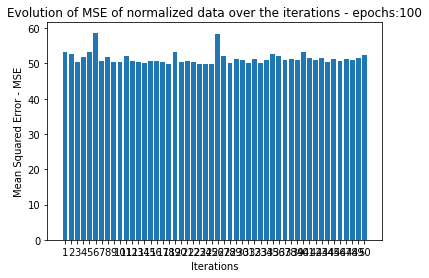

In [26]:
# Visualize the mean squared error
x = ['{0}'.format(i+1) for i in range(50)]
plt.bar(x,mse3)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error - MSE')
plt.title('Evolution of MSE of normalized data over the iterations - epochs:100')
plt.show()

In [27]:
# Mean of the MSE's
mean_partC = np.array(mse3).mean()
print("Mean of the MSE's:",mean_partC)

# Standard deviation of the MSE'S
std_partC = np.array(mse3).std()
print("Standard deviation of the MSE's:",std_partC)

Mean of the MSE's: 51.4439490644891
Standard deviation of the MSE's: 1.7234248224899242


#### Comparison between the Mean of the Mean Squared Errors on increasing the number of epochs to train the model

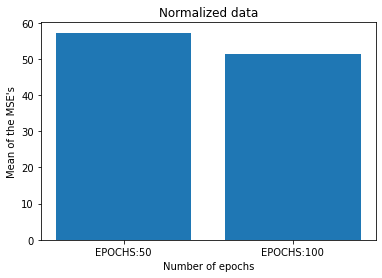

In [28]:
plt.bar(['EPOCHS:50','EPOCHS:100'],[mean_partB,mean_partC])
plt.xlabel('Number of epochs')
plt.ylabel("Mean of the MSE's")
plt.title('Normalized data')
plt.show()

In [29]:
# Difference between both mean of the MSE's
mean_partC-mean_partB

-5.8320181693097055

It can be observed that on increasing the number of epochs the mean of the MSE reduces. So, to reduce error and increase accuracy of our model, we can increse the number of epochs.

## D. Build a new model and report mean for the MSE's with normalized data

Let us build a new neural network model that performs regression. The charecteristics of the new model are bleow:
<ul>
    <li>Number of hidden layers: <b>3</b></li>
    <li>Number of nodes in each of the hidden layer: <b>10</b></li>
    <li>Activation function: <b>ReLU</b></li>
    <li>Rest of the features are same as the <b>Base Line Model</b></li>
    </ul>

In [30]:
# Building the new neural network
def base_line_model_new():
    # Model Creation
    reg_mod = Sequential()
    reg_mod.add(Dense(10, activation='relu',input_shape=(n_cols,)))
    reg_mod.add(Dense(10, activation='relu',input_shape=(n_cols,)))
    reg_mod.add(Dense(10, activation='relu',input_shape=(n_cols,)))
    reg_mod.add(Dense(1))
    # Model compilation
    reg_mod.compile(optimizer='adam', loss='mean_squared_error')
    return reg_mod

In [31]:
model_new = base_line_model_new()

In [37]:
# Computing mean squared error for each iteration
mse_new = [] # Initializing the list for appending the MSE upon each iteration
for i in range(50):
    mse_new.append(MSE(model_new, X_norm, Y, 50))

-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 38.1140 - val_loss: 41.7905
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 36.3280 - val_loss: 40.7122
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 37.7269 - val_loss: 44.7886
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 36.9279 - val_loss: 42.1988
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 35.1784 - val_loss: 42.0318
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 36.0928 - val_loss: 43.0443
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 36.8112 - val_loss: 44.8216
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 36.1908 - val_loss: 41.4896
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 35.9147 -

16/16 [==============================] - 0s 5ms/step - loss: 34.9916 - val_loss: 43.4063
Epoch 30/50
16/16 [==============================] - 0s 5ms/step - loss: 35.8276 - val_loss: 42.2006
Epoch 31/50
16/16 [==============================] - 0s 6ms/step - loss: 35.8889 - val_loss: 41.4892
Epoch 32/50
16/16 [==============================] - 0s 5ms/step - loss: 35.3998 - val_loss: 45.6553
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 37.4071 - val_loss: 42.3049
Epoch 34/50
16/16 [==============================] - 0s 6ms/step - loss: 36.6967 - val_loss: 41.3066
Epoch 35/50
16/16 [==============================] - 0s 6ms/step - loss: 39.8748 - val_loss: 46.3136
Epoch 36/50
16/16 [==============================] - 0s 6ms/step - loss: 39.3005 - val_loss: 42.3844
Epoch 37/50
16/16 [==============================] - 0s 5ms/step - loss: 36.5351 - val_loss: 41.9825
Epoch 38/50
16/16 [==============================] - 0s 6ms/step - loss: 35.6692 - val_loss: 41.7582
Ep

Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 36.2952 - val_loss: 42.4426
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 34.2922 - val_loss: 42.1092
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 35.2684 - val_loss: 43.2028
Epoch 10/50
16/16 [==============================] - 0s 6ms/step - loss: 36.8141 - val_loss: 41.5116
Epoch 11/50
16/16 [==============================] - 0s 6ms/step - loss: 34.2943 - val_loss: 43.0931
Epoch 12/50
16/16 [==============================] - 0s 6ms/step - loss: 36.6215 - val_loss: 43.1441
Epoch 13/50
16/16 [==============================] - 0s 4ms/step - loss: 36.6727 - val_loss: 41.9487
Epoch 14/50
16/16 [==============================] - 0s 5ms/step - loss: 35.9379 - val_loss: 49.4768
Epoch 15/50
16/16 [==============================] - 0s 4ms/step - loss: 37.2431 - val_loss: 41.7025
Epoch 16/50
16/16 [==============================] - 0s 5ms/step - loss: 36.8669 - val_loss: 4

16/16 [==============================] - 0s 5ms/step - loss: 35.0525 - val_loss: 49.1334
Epoch 37/50
16/16 [==============================] - 0s 5ms/step - loss: 36.8822 - val_loss: 43.3928
Epoch 38/50
16/16 [==============================] - 0s 5ms/step - loss: 35.7754 - val_loss: 42.2993
Epoch 39/50
16/16 [==============================] - 0s 4ms/step - loss: 36.5648 - val_loss: 48.6905
Epoch 40/50
16/16 [==============================] - 0s 5ms/step - loss: 38.8172 - val_loss: 42.8527
Epoch 41/50
16/16 [==============================] - 0s 6ms/step - loss: 35.7460 - val_loss: 42.8780
Epoch 42/50
16/16 [==============================] - 0s 5ms/step - loss: 35.1571 - val_loss: 42.4822
Epoch 43/50
16/16 [==============================] - 0s 5ms/step - loss: 33.9166 - val_loss: 44.4633
Epoch 44/50
16/16 [==============================] - 0s 5ms/step - loss: 37.6641 - val_loss: 49.2143
Epoch 45/50
16/16 [==============================] - 0s 5ms/step - loss: 37.0598 - val_loss: 42.1664
Ep

Epoch 14/50
16/16 [==============================] - 0s 5ms/step - loss: 38.3182 - val_loss: 43.9680
Epoch 15/50
16/16 [==============================] - 0s 6ms/step - loss: 38.0819 - val_loss: 46.3991
Epoch 16/50
16/16 [==============================] - 0s 6ms/step - loss: 38.4409 - val_loss: 42.9157
Epoch 17/50
16/16 [==============================] - 0s 6ms/step - loss: 36.1643 - val_loss: 45.0945
Epoch 18/50
16/16 [==============================] - 0s 5ms/step - loss: 35.7004 - val_loss: 42.5819
Epoch 19/50
16/16 [==============================] - 0s 5ms/step - loss: 37.3940 - val_loss: 45.4574
Epoch 20/50
16/16 [==============================] - 0s 6ms/step - loss: 36.4349 - val_loss: 46.5452
Epoch 21/50
16/16 [==============================] - 0s 5ms/step - loss: 35.1409 - val_loss: 44.3857
Epoch 22/50
16/16 [==============================] - 0s 5ms/step - loss: 35.1189 - val_loss: 45.1165
Epoch 23/50
16/16 [==============================] - 0s 4ms/step - loss: 35.7619 - val_loss

16/16 [==============================] - 0s 5ms/step - loss: 34.5914 - val_loss: 41.8627
Epoch 44/50
16/16 [==============================] - 0s 6ms/step - loss: 34.8713 - val_loss: 43.0724
Epoch 45/50
16/16 [==============================] - 0s 5ms/step - loss: 36.1290 - val_loss: 42.1506
Epoch 46/50
16/16 [==============================] - 0s 6ms/step - loss: 36.0946 - val_loss: 42.8175
Epoch 47/50
16/16 [==============================] - 0s 6ms/step - loss: 35.7184 - val_loss: 48.8120
Epoch 48/50
16/16 [==============================] - 0s 6ms/step - loss: 36.5067 - val_loss: 49.5081
Epoch 49/50
16/16 [==============================] - 0s 5ms/step - loss: 35.7393 - val_loss: 46.8649
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 34.4916 - val_loss: 42.4669
Epoch 2/50
16/16 [===

Epoch 21/50
16/16 [==============================] - 0s 5ms/step - loss: 36.6818 - val_loss: 43.5391
Epoch 22/50
16/16 [==============================] - 0s 6ms/step - loss: 42.9327 - val_loss: 46.1507
Epoch 23/50
16/16 [==============================] - 0s 6ms/step - loss: 38.1481 - val_loss: 46.8310
Epoch 24/50
16/16 [==============================] - 0s 6ms/step - loss: 39.1245 - val_loss: 45.0532
Epoch 25/50
16/16 [==============================] - 0s 6ms/step - loss: 37.0457 - val_loss: 43.3352
Epoch 26/50
16/16 [==============================] - 0s 6ms/step - loss: 36.0416 - val_loss: 44.8433
Epoch 27/50
16/16 [==============================] - 0s 6ms/step - loss: 34.1104 - val_loss: 44.0976
Epoch 28/50
16/16 [==============================] - 0s 6ms/step - loss: 33.7565 - val_loss: 42.8252
Epoch 29/50
16/16 [==============================] - 0s 5ms/step - loss: 34.6340 - val_loss: 43.6779
Epoch 30/50
16/16 [==============================] - 0s 6ms/step - loss: 34.2732 - val_loss

10/10 [==============================] - 0s 1ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 10ms/step - loss: 37.1322 - val_loss: 45.5014
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 35.0649 - val_loss: 42.6172
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 34.2061 - val_loss: 41.6811
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 33.5443 - val_loss: 44.5290
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 35.1853 - val_loss: 42.7949
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 35.3333 - val_loss: 41.5388
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 34.5174 - val_loss: 45.0520
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 35.3729 - val_loss: 44.4146
Epoch 9/50
16/16 [=========

Epoch 28/50
16/16 [==============================] - 0s 4ms/step - loss: 34.6247 - val_loss: 41.6339
Epoch 29/50
16/16 [==============================] - 0s 3ms/step - loss: 35.8161 - val_loss: 46.2974
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 37.4649 - val_loss: 50.6614
Epoch 31/50
16/16 [==============================] - 0s 5ms/step - loss: 41.8392 - val_loss: 52.6076
Epoch 32/50
16/16 [==============================] - 0s 6ms/step - loss: 34.4061 - val_loss: 42.1341
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 33.5147 - val_loss: 48.5328
Epoch 34/50
16/16 [==============================] - 0s 5ms/step - loss: 36.4077 - val_loss: 49.4693
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 35.7116 - val_loss: 45.0272
Epoch 36/50
16/16 [==============================] - 0s 3ms/step - loss: 41.0922 - val_loss: 46.9339
Epoch 37/50
16/16 [==============================] - 0s 5ms/step - loss: 34.7680 - val_loss

Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 34.4620 - val_loss: 43.1375
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 36.9003 - val_loss: 41.9734
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 34.4919 - val_loss: 43.7076
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 33.7799 - val_loss: 43.6307
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 33.9432 - val_loss: 43.3176
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 34.3145 - val_loss: 42.2910
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 33.6333 - val_loss: 43.5080
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 34.0648 - val_loss: 42.5163
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 33.9404 - val_loss: 48.2339
Epoch 15/50
16/16 [==============================] - 0s 4ms/step - loss: 38.8107 - val_loss: 42

16/16 [==============================] - 0s 4ms/step - loss: 33.8078 - val_loss: 43.0435
Epoch 36/50
16/16 [==============================] - 0s 4ms/step - loss: 35.5010 - val_loss: 50.9525
Epoch 37/50
16/16 [==============================] - 0s 4ms/step - loss: 33.9572 - val_loss: 42.7696
Epoch 38/50
16/16 [==============================] - 0s 4ms/step - loss: 33.2071 - val_loss: 45.3055
Epoch 39/50
16/16 [==============================] - 0s 3ms/step - loss: 32.7755 - val_loss: 45.1105
Epoch 40/50
16/16 [==============================] - 0s 4ms/step - loss: 33.0605 - val_loss: 41.3532
Epoch 41/50
16/16 [==============================] - 0s 3ms/step - loss: 35.7958 - val_loss: 44.1542
Epoch 42/50
16/16 [==============================] - 0s 4ms/step - loss: 32.2903 - val_loss: 43.0943
Epoch 43/50
16/16 [==============================] - 0s 4ms/step - loss: 33.2571 - val_loss: 43.3301
Epoch 44/50
16/16 [==============================] - 0s 4ms/step - loss: 33.4629 - val_loss: 46.3160
Ep

16/16 [==============================] - 0s 5ms/step - loss: 33.7895 - val_loss: 47.7412
Epoch 14/50
16/16 [==============================] - 0s 5ms/step - loss: 35.1239 - val_loss: 42.9684
Epoch 15/50
16/16 [==============================] - 0s 4ms/step - loss: 32.6311 - val_loss: 41.1395
Epoch 16/50
16/16 [==============================] - 0s 5ms/step - loss: 33.1765 - val_loss: 44.2420
Epoch 17/50
16/16 [==============================] - 0s 5ms/step - loss: 35.3364 - val_loss: 41.3840
Epoch 18/50
16/16 [==============================] - 0s 5ms/step - loss: 32.3450 - val_loss: 43.2101
Epoch 19/50
16/16 [==============================] - 0s 5ms/step - loss: 31.7516 - val_loss: 43.0655
Epoch 20/50
16/16 [==============================] - 0s 5ms/step - loss: 33.5493 - val_loss: 43.6770
Epoch 21/50
16/16 [==============================] - 0s 4ms/step - loss: 32.4976 - val_loss: 42.7105
Epoch 22/50
16/16 [==============================] - 0s 5ms/step - loss: 32.4285 - val_loss: 44.9680
Ep

16/16 [==============================] - 0s 6ms/step - loss: 32.3101 - val_loss: 45.4972
Epoch 43/50
16/16 [==============================] - 0s 6ms/step - loss: 32.4387 - val_loss: 42.6527
Epoch 44/50
16/16 [==============================] - 0s 6ms/step - loss: 32.3820 - val_loss: 42.4268
Epoch 45/50
16/16 [==============================] - 0s 6ms/step - loss: 31.8828 - val_loss: 42.0135
Epoch 46/50
16/16 [==============================] - 0s 6ms/step - loss: 31.9345 - val_loss: 44.5218
Epoch 47/50
16/16 [==============================] - 0s 5ms/step - loss: 32.6564 - val_loss: 42.0598
Epoch 48/50
16/16 [==============================] - 0s 6ms/step - loss: 32.5550 - val_loss: 53.7302
Epoch 49/50
16/16 [==============================] - 0s 5ms/step - loss: 34.7455 - val_loss: 44.1730
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==

16/16 [==============================] - 0s 6ms/step - loss: 32.0385 - val_loss: 43.4139
Epoch 21/50
16/16 [==============================] - 0s 4ms/step - loss: 32.7938 - val_loss: 46.2695
Epoch 22/50
16/16 [==============================] - 0s 5ms/step - loss: 33.4756 - val_loss: 42.3084
Epoch 23/50
16/16 [==============================] - 0s 6ms/step - loss: 32.6591 - val_loss: 51.4449
Epoch 24/50
16/16 [==============================] - 0s 5ms/step - loss: 40.3547 - val_loss: 54.6782
Epoch 25/50
16/16 [==============================] - 0s 5ms/step - loss: 39.1655 - val_loss: 49.2534
Epoch 26/50
16/16 [==============================] - 0s 5ms/step - loss: 38.9777 - val_loss: 45.7355
Epoch 27/50
16/16 [==============================] - 0s 5ms/step - loss: 33.1028 - val_loss: 45.3311
Epoch 28/50
16/16 [==============================] - 0s 5ms/step - loss: 33.3127 - val_loss: 47.1472
Epoch 29/50
16/16 [==============================] - 0s 5ms/step - loss: 32.3880 - val_loss: 43.7902
Ep

16/16 [==============================] - 0s 6ms/step - loss: 32.3143 - val_loss: 43.8047
Epoch 50/50
10/10 [==============================] - 0s 0s/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 33.4760 - val_loss: 45.9694
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 31.8143 - val_loss: 45.7632
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 32.0179 - val_loss: 42.0695
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 31.9051 - val_loss: 45.3706
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 32.0998 - val_loss: 44.8654
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 32.8868 - val_loss: 46.5649
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 32.3239 - val_loss: 43.6261
Epoch 8/50
16/16 [==========

16/16 [==============================] - 0s 5ms/step - loss: 31.6920 - val_loss: 42.7922
Epoch 28/50
16/16 [==============================] - 0s 6ms/step - loss: 31.9751 - val_loss: 44.9932
Epoch 29/50
16/16 [==============================] - 0s 5ms/step - loss: 34.3863 - val_loss: 44.4292
Epoch 30/50
16/16 [==============================] - 0s 5ms/step - loss: 31.1140 - val_loss: 42.7919
Epoch 31/50
16/16 [==============================] - 0s 5ms/step - loss: 30.1969 - val_loss: 42.2887
Epoch 32/50
16/16 [==============================] - 0s 6ms/step - loss: 30.6878 - val_loss: 44.2726
Epoch 33/50
16/16 [==============================] - 0s 6ms/step - loss: 34.7668 - val_loss: 47.1563
Epoch 34/50
16/16 [==============================] - 0s 6ms/step - loss: 32.3439 - val_loss: 45.9172
Epoch 35/50
16/16 [==============================] - 0s 5ms/step - loss: 33.2873 - val_loss: 42.9131
Epoch 36/50
16/16 [==============================] - 0s 5ms/step - loss: 32.1192 - val_loss: 43.8992
Ep

Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 31.7943 - val_loss: 44.0418
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 30.8893 - val_loss: 47.1396
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 33.5901 - val_loss: 49.2693
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 37.6541 - val_loss: 53.6104
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 31.6459 - val_loss: 43.3575
Epoch 10/50
16/16 [==============================] - 0s 6ms/step - loss: 31.9646 - val_loss: 42.3967
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 31.6688 - val_loss: 43.5457
Epoch 12/50
16/16 [==============================] - 0s 6ms/step - loss: 30.9996 - val_loss: 48.1809
Epoch 13/50
16/16 [==============================] - 0s 6ms/step - loss: 34.5514 - val_loss: 49.5944
Epoch 14/50
16/16 [==============================] - 0s 5ms/step - loss: 31.2039 - val_loss: 43.

16/16 [==============================] - 0s 4ms/step - loss: 30.7489 - val_loss: 44.3495
Epoch 35/50
16/16 [==============================] - 0s 4ms/step - loss: 31.0488 - val_loss: 42.6231
Epoch 36/50
16/16 [==============================] - 0s 5ms/step - loss: 30.9901 - val_loss: 43.2015
Epoch 37/50
16/16 [==============================] - 0s 5ms/step - loss: 31.3537 - val_loss: 44.2435
Epoch 38/50
16/16 [==============================] - 0s 4ms/step - loss: 32.9328 - val_loss: 44.6420
Epoch 39/50
16/16 [==============================] - 0s 6ms/step - loss: 31.7071 - val_loss: 44.2985
Epoch 40/50
16/16 [==============================] - 0s 4ms/step - loss: 31.2929 - val_loss: 45.3715
Epoch 41/50
16/16 [==============================] - 0s 5ms/step - loss: 31.6323 - val_loss: 42.4383
Epoch 42/50
16/16 [==============================] - 0s 6ms/step - loss: 30.6771 - val_loss: 46.2180
Epoch 43/50
16/16 [==============================] - 0s 6ms/step - loss: 30.7979 - val_loss: 43.0294
Ep

16/16 [==============================] - 0s 3ms/step - loss: 30.7998 - val_loss: 43.8400
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 30.3195 - val_loss: 43.2723
Epoch 14/50
16/16 [==============================] - 0s 4ms/step - loss: 34.0945 - val_loss: 47.7816
Epoch 15/50
16/16 [==============================] - 0s 5ms/step - loss: 37.4069 - val_loss: 42.0920
Epoch 16/50
16/16 [==============================] - 0s 4ms/step - loss: 33.7935 - val_loss: 44.4520
Epoch 17/50
16/16 [==============================] - 0s 5ms/step - loss: 31.2883 - val_loss: 43.9133
Epoch 18/50
16/16 [==============================] - 0s 5ms/step - loss: 33.7510 - val_loss: 52.9235
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 32.9586 - val_loss: 46.6993
Epoch 20/50
16/16 [==============================] - 0s 6ms/step - loss: 30.1787 - val_loss: 45.0900
Epoch 21/50
16/16 [==============================] - 0s 5ms/step - loss: 32.6283 - val_loss: 43.3857
Ep

16/16 [==============================] - 0s 7ms/step - loss: 32.8518 - val_loss: 44.6246
Epoch 42/50
16/16 [==============================] - 0s 6ms/step - loss: 31.9108 - val_loss: 46.5081
Epoch 43/50
16/16 [==============================] - 0s 5ms/step - loss: 32.8571 - val_loss: 44.7048
Epoch 44/50
16/16 [==============================] - 0s 5ms/step - loss: 31.1177 - val_loss: 46.0394
Epoch 45/50
16/16 [==============================] - 0s 4ms/step - loss: 29.8144 - val_loss: 48.7444
Epoch 46/50
16/16 [==============================] - 0s 7ms/step - loss: 30.8066 - val_loss: 43.9632
Epoch 47/50
16/16 [==============================] - 0s 5ms/step - loss: 30.9778 - val_loss: 45.2541
Epoch 48/50
16/16 [==============================] - 0s 6ms/step - loss: 32.2458 - val_loss: 47.0078
Epoch 49/50
16/16 [==============================] - 0s 6ms/step - loss: 31.0127 - val_loss: 45.1967
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
-----DESCRIPTION---- Predictors Labels

16/16 [==============================] - 0s 4ms/step - loss: 32.2229 - val_loss: 44.3698
Epoch 20/50
16/16 [==============================] - 0s 4ms/step - loss: 32.3678 - val_loss: 45.5941
Epoch 21/50
16/16 [==============================] - 0s 4ms/step - loss: 30.5532 - val_loss: 43.0458
Epoch 22/50
16/16 [==============================] - 0s 5ms/step - loss: 30.5160 - val_loss: 45.0112
Epoch 23/50
16/16 [==============================] - 0s 6ms/step - loss: 29.0005 - val_loss: 43.2159
Epoch 24/50
16/16 [==============================] - 0s 5ms/step - loss: 29.9581 - val_loss: 43.2637
Epoch 25/50
16/16 [==============================] - 0s 5ms/step - loss: 29.8413 - val_loss: 42.0251
Epoch 26/50
16/16 [==============================] - 0s 5ms/step - loss: 30.4910 - val_loss: 44.4071
Epoch 27/50
16/16 [==============================] - 0s 5ms/step - loss: 30.9448 - val_loss: 47.6450
Epoch 28/50
16/16 [==============================] - 0s 5ms/step - loss: 33.3188 - val_loss: 46.8293
Ep

16/16 [==============================] - 0s 6ms/step - loss: 31.6511 - val_loss: 55.7933
Epoch 49/50
16/16 [==============================] - 0s 6ms/step - loss: 37.7334 - val_loss: 50.9249
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 30.2635 - val_loss: 45.2902
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 30.0044 - val_loss: 43.9539
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 30.2656 - val_loss: 43.4817
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 29.8488 - val_loss: 43.1552
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 29.3546 - val_loss: 42.4032
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 29.5020 - val_loss: 42.9340
Epoch 7/50
16/16 [========

16/16 [==============================] - 0s 4ms/step - loss: 30.5677 - val_loss: 43.3951
Epoch 27/50
16/16 [==============================] - 0s 5ms/step - loss: 30.2375 - val_loss: 43.5522
Epoch 28/50
16/16 [==============================] - 0s 5ms/step - loss: 31.8562 - val_loss: 53.1226
Epoch 29/50
16/16 [==============================] - 0s 5ms/step - loss: 33.1426 - val_loss: 45.2958
Epoch 30/50
16/16 [==============================] - 0s 4ms/step - loss: 30.3580 - val_loss: 43.4284
Epoch 31/50
16/16 [==============================] - 0s 7ms/step - loss: 30.6859 - val_loss: 43.8805
Epoch 32/50
16/16 [==============================] - 0s 5ms/step - loss: 29.8288 - val_loss: 44.1773
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 29.5415 - val_loss: 44.8751
Epoch 34/50
16/16 [==============================] - 0s 5ms/step - loss: 33.1970 - val_loss: 46.6500
Epoch 35/50
16/16 [==============================] - 0s 4ms/step - loss: 33.8825 - val_loss: 44.8335
Ep

Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 28.8027 - val_loss: 44.3023
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 29.2451 - val_loss: 48.3128
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 29.7193 - val_loss: 44.5680
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 30.1610 - val_loss: 42.8872
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 29.5522 - val_loss: 44.6704
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 29.0278 - val_loss: 44.4240
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 30.7275 - val_loss: 44.1640
Epoch 11/50
16/16 [==============================] - 0s 4ms/step - loss: 31.4929 - val_loss: 44.0270
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 30.2282 - val_loss: 43.3864
Epoch 13/50
16/16 [==============================] - 0s 5ms/step - loss: 29.2720 - val_loss: 43.7

16/16 [==============================] - 0s 5ms/step - loss: 29.9614 - val_loss: 50.2111
Epoch 34/50
16/16 [==============================] - 0s 4ms/step - loss: 32.1085 - val_loss: 44.7514
Epoch 35/50
16/16 [==============================] - 0s 6ms/step - loss: 30.5150 - val_loss: 44.9513
Epoch 36/50
16/16 [==============================] - 0s 5ms/step - loss: 31.3668 - val_loss: 43.6283
Epoch 37/50
16/16 [==============================] - 0s 3ms/step - loss: 30.1938 - val_loss: 44.5742
Epoch 38/50
16/16 [==============================] - 0s 6ms/step - loss: 29.3333 - val_loss: 44.3377
Epoch 39/50
16/16 [==============================] - 0s 3ms/step - loss: 32.3638 - val_loss: 43.8567
Epoch 40/50
16/16 [==============================] - 0s 5ms/step - loss: 29.7374 - val_loss: 44.8789
Epoch 41/50
16/16 [==============================] - 0s 5ms/step - loss: 30.2242 - val_loss: 44.4880
Epoch 42/50
16/16 [==============================] - 0s 5ms/step - loss: 31.5913 - val_loss: 46.3784
Ep

16/16 [==============================] - 0s 5ms/step - loss: 30.2779 - val_loss: 50.2998
Epoch 12/50
16/16 [==============================] - 0s 6ms/step - loss: 31.0683 - val_loss: 43.2286
Epoch 13/50
16/16 [==============================] - 0s 7ms/step - loss: 32.0701 - val_loss: 55.8801
Epoch 14/50
16/16 [==============================] - 0s 6ms/step - loss: 32.7783 - val_loss: 44.2193
Epoch 15/50
16/16 [==============================] - 0s 5ms/step - loss: 29.5647 - val_loss: 42.2663
Epoch 16/50
16/16 [==============================] - 0s 5ms/step - loss: 29.4052 - val_loss: 44.8387
Epoch 17/50
16/16 [==============================] - 0s 4ms/step - loss: 28.8711 - val_loss: 45.0476
Epoch 18/50
16/16 [==============================] - 0s 5ms/step - loss: 28.8690 - val_loss: 42.3205
Epoch 19/50
16/16 [==============================] - 0s 5ms/step - loss: 29.8123 - val_loss: 44.2098
Epoch 20/50
16/16 [==============================] - 0s 4ms/step - loss: 28.5147 - val_loss: 43.1371
Ep

16/16 [==============================] - 0s 6ms/step - loss: 27.8876 - val_loss: 42.9391
Epoch 41/50
16/16 [==============================] - 0s 5ms/step - loss: 29.8170 - val_loss: 45.8541
Epoch 42/50
16/16 [==============================] - 0s 6ms/step - loss: 31.6639 - val_loss: 44.4200
Epoch 43/50
16/16 [==============================] - 0s 4ms/step - loss: 30.2520 - val_loss: 46.1905
Epoch 44/50
16/16 [==============================] - 0s 5ms/step - loss: 28.0408 - val_loss: 43.2969
Epoch 45/50
16/16 [==============================] - 0s 5ms/step - loss: 29.0818 - val_loss: 47.3756
Epoch 46/50
16/16 [==============================] - 0s 6ms/step - loss: 28.9226 - val_loss: 45.4001
Epoch 47/50
16/16 [==============================] - 0s 6ms/step - loss: 29.1808 - val_loss: 42.7084
Epoch 48/50
16/16 [==============================] - 0s 6ms/step - loss: 29.1914 - val_loss: 43.2715
Epoch 49/50
16/16 [==============================] - 0s 5ms/step - loss: 28.8340 - val_loss: 42.5288
Ep

16/16 [==============================] - 0s 5ms/step - loss: 29.1168 - val_loss: 45.6073
Epoch 19/50
16/16 [==============================] - 0s 6ms/step - loss: 28.8609 - val_loss: 42.8524
Epoch 20/50
16/16 [==============================] - 0s 5ms/step - loss: 28.1445 - val_loss: 43.7238
Epoch 21/50
16/16 [==============================] - 0s 6ms/step - loss: 29.1828 - val_loss: 42.7849
Epoch 22/50
16/16 [==============================] - 0s 5ms/step - loss: 28.9898 - val_loss: 46.6030
Epoch 23/50
16/16 [==============================] - 0s 5ms/step - loss: 28.3888 - val_loss: 42.7966
Epoch 24/50
16/16 [==============================] - 0s 4ms/step - loss: 30.1069 - val_loss: 47.2809
Epoch 25/50
16/16 [==============================] - 0s 4ms/step - loss: 28.4034 - val_loss: 43.9963
Epoch 26/50
16/16 [==============================] - 0s 5ms/step - loss: 29.6853 - val_loss: 44.9708
Epoch 27/50
16/16 [==============================] - 0s 6ms/step - loss: 28.6695 - val_loss: 42.7746
Ep

16/16 [==============================] - 0s 5ms/step - loss: 29.7383 - val_loss: 45.2064
Epoch 48/50
16/16 [==============================] - 0s 6ms/step - loss: 28.4973 - val_loss: 44.2258
Epoch 49/50
16/16 [==============================] - 0s 6ms/step - loss: 28.0362 - val_loss: 43.2870
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
-----DESCRIPTION---- Predictors Labels
Size of training set: (721, 8) (721, 1)
Size of testing set:  (309, 8) (309, 1)
Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 30.6893 - val_loss: 54.2096
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 32.3516 - val_loss: 44.9842
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 28.3634 - val_loss: 53.3913
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 33.9037 - val_loss: 48.3320
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 28.7513 - val_loss: 44.7966
Epoch 6/50
16/16 [=======

Epoch 25/50
16/16 [==============================] - 0s 6ms/step - loss: 28.9675 - val_loss: 43.4070
Epoch 26/50
16/16 [==============================] - 0s 6ms/step - loss: 29.8690 - val_loss: 42.1471
Epoch 27/50
16/16 [==============================] - 0s 5ms/step - loss: 28.9001 - val_loss: 43.7821
Epoch 28/50
16/16 [==============================] - 0s 5ms/step - loss: 28.0505 - val_loss: 43.0786
Epoch 29/50
16/16 [==============================] - 0s 4ms/step - loss: 29.3418 - val_loss: 42.6399
Epoch 30/50
16/16 [==============================] - 0s 5ms/step - loss: 33.2005 - val_loss: 42.7938
Epoch 31/50
16/16 [==============================] - 0s 5ms/step - loss: 28.6075 - val_loss: 44.2857
Epoch 32/50
16/16 [==============================] - 0s 5ms/step - loss: 28.8149 - val_loss: 42.6849
Epoch 33/50
16/16 [==============================] - 0s 5ms/step - loss: 28.2489 - val_loss: 42.4790
Epoch 34/50
16/16 [==============================] - 0s 5ms/step - loss: 28.9129 - val_loss

Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 31.4311 - val_loss: 43.1442
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 31.8904 - val_loss: 43.5068
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 29.2889 - val_loss: 45.0106
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 29.8723 - val_loss: 43.0462
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 31.0772 - val_loss: 44.5372
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 28.3870 - val_loss: 42.9033
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 28.6378 - val_loss: 42.6972
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 27.6349 - val_loss: 42.9478
Epoch 11/50
16/16 [==============================] - 0s 6ms/step - loss: 30.5358 - val_loss: 43.5531
Epoch 12/50
16/16 [==============================] - 0s 6ms/step - loss: 28.1469 - val_loss: 42.82

16/16 [==============================] - 0s 6ms/step - loss: 30.2054 - val_loss: 42.7099
Epoch 33/50
16/16 [==============================] - 0s 6ms/step - loss: 28.0185 - val_loss: 43.9061
Epoch 34/50
16/16 [==============================] - 0s 6ms/step - loss: 28.3688 - val_loss: 44.0245
Epoch 35/50
16/16 [==============================] - 0s 6ms/step - loss: 28.0167 - val_loss: 43.7626
Epoch 36/50
16/16 [==============================] - 0s 5ms/step - loss: 29.9480 - val_loss: 47.9374
Epoch 37/50
16/16 [==============================] - 0s 5ms/step - loss: 29.4881 - val_loss: 45.6498
Epoch 38/50
16/16 [==============================] - 0s 6ms/step - loss: 28.4732 - val_loss: 44.9071
Epoch 39/50
16/16 [==============================] - 0s 5ms/step - loss: 30.8004 - val_loss: 45.9335
Epoch 40/50
16/16 [==============================] - 0s 5ms/step - loss: 28.5529 - val_loss: 43.5186
Epoch 41/50
16/16 [==============================] - 0s 7ms/step - loss: 27.6482 - val_loss: 42.7451
Ep

#### Reporting Mean and Standard Deviation of the Mean Squared Errors

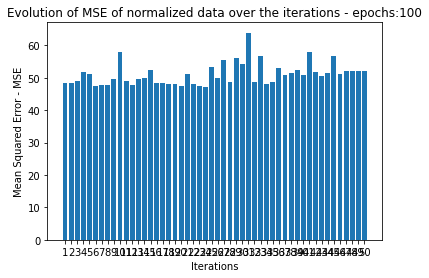

In [38]:
# Visualize the mean squared error
x = ['{0}'.format(i+1) for i in range(50)]
plt.bar(x,mse_new)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error - MSE')
plt.title('Evolution of MSE of normalized data over the iterations - epochs:100')
plt.show()

In [39]:
# Mean of the MSE's
mean_partD = np.array(mse_new).mean()
print("Mean of the MSE's:",mean_partD)

# Standard deviation of the MSE'S
std_partD = np.array(mse_new).std()
print("Standard deviation of the MSE's:",std_partD)

Mean of the MSE's: 51.086674511009605
Standard deviation of the MSE's: 3.4092534187366597


#### Comparison between the Mean of the Mean Squared Errors on increasing the hidden layers in the model built

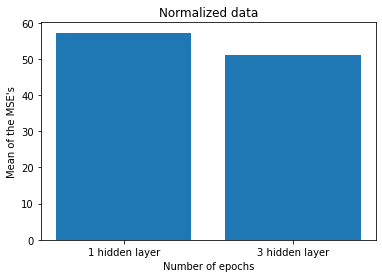

In [40]:
plt.bar(['1 hidden layer','3 hidden layer'],[mean_partB,mean_partD])
plt.xlabel('Number of epochs')
plt.ylabel("Mean of the MSE's")
plt.title('Normalized data')
plt.show()

In [41]:
# Difference between both mean of the MSE's
mean_partD-mean_partB

-6.189292722789197

Thus it can be observef on the hidden layers in the model, the error decreases and accuracy of the prediction increases.